In [1]:
#importing required libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics



### Importing and reading Data set

In [2]:

housing_df1=pd.read_csv('train.csv')

In [3]:
housing_df1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
#checking shape of dataset
housing_df1.shape

(1460, 81)

In [5]:
## Looking at all the column names
housing_df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Check column details 
housing_df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Dataset consist object,int64,float64 datatype

In [7]:
# description of the dataset
housing_df1.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
#checking duplicates
housing_df1.duplicated().sum()

0

No duplicate value exist in dataset. So we are good to go.

#### Checking Numeric varaiables 

In [9]:
num_var = housing_df1.select_dtypes(include = ['int64', 'float64'])
num_var.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

##### checking categorical data in dataset

In [10]:
cat_var = housing_df1.select_dtypes(include ='object')
cat_var.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

#### Null value check

In [11]:
missing_value=pd.DataFrame((round(100*(housing_df1.isnull().sum()/len(housing_df1.index)), 3)), columns=['Null'])
missing_value[missing_value["Null"] > 0]

Null
LotFrontage   17.740
Alley         93.767
MasVnrType     0.548
MasVnrArea     0.548
BsmtQual       2.534
BsmtCond       2.534
BsmtExposure   2.603
BsmtFinType1   2.534
BsmtFinType2   2.603
Electrical     0.068
FireplaceQu   47.260
GarageType     5.548
GarageYrBlt    5.548
GarageFinish   5.548
GarageQual     5.548
GarageCond     5.548
PoolQC        99.521
Fence         80.753
MiscFeature   96.301

Most of the variables are of catogrical type and having null values.While looking into Data Descreption found NA indicates Feature Not present so we can consider as 'meaningful missing', so imputing NULL as NONE because it might effect the Price-


Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature




##### Imputing NA value with None

In [12]:
#treating meaningful missing values with None

catg_null = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','Electrical']
for i in catg_null:
    housing_df1[i].fillna("None", inplace=True)

Below are remaining features having Null value which is actual missing so try to impute relative value 

In [13]:
#checking after imputation any null value present
missing_value=pd.DataFrame((round(100*(housing_df1.isnull().sum()/len(housing_df1.index)), 3)), columns=['Null'])
missing_value[missing_value["Null"] > 0]

Null
LotFrontage  17.740
MasVnrArea    0.548
GarageYrBlt   5.548

We found above 3 features having na values

In [14]:
#using median to impute the value because we can se outliers
print(housing_df1['LotFrontage'].dtype)
print(housing_df1['LotFrontage'].describe())
housing_df1['LotFrontage'] = housing_df1['LotFrontage'].fillna(housing_df1['LotFrontage'].median())


float64
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [15]:
#imputing media as we can see outliers
print(housing_df1['MasVnrArea'].dtype)
print(housing_df1['MasVnrArea'].describe())
housing_df1["MasVnrArea"].fillna(housing_df1["MasVnrArea"].median(), inplace=True)


float64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [16]:
#imputing 0 as value not present
housing_df1['GarageYrBlt']= housing_df1['GarageYrBlt'].fillna(0)
housing_df1['GarageYrBlt'] = housing_df1['GarageYrBlt'].astype(int)

In [17]:
missing_value=pd.DataFrame((round(100*(housing_df1.isnull().sum()/len(housing_df1.index)), 3)), columns=['Null'])
missing_value[missing_value["Null"] > 0]

Empty DataFrame
Columns: [Null]
Index: []

We have done with Null value handling,now check data quality whether we can proced with all the features or not.

Checking features having more the 80% same value

In [18]:
def check_variance(a, p):
    
    my_list= []
    cat_var = housing_df1.select_dtypes(include=['object'])
    for col in (cat_var):
        if(housing_df1[col].value_counts().max() > int(p*len(housing_df1.index)/100)):
            my_list.append(col)
    return my_list
feature_coll = check_variance(a=housing_df1, p=80)
feature_coll

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

These are few features which having 80% of same values, if we plot against sales price we cant see much variances.

Clearly we can see low variance/corealtion between SalePrice and these features
'Street','Alley','LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','RoofMatl','ExterCond','BsmtCond',
'BsmtFinType2','Heating','SaleCondition'
'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType',
    

In [282]:
def sct_plot(c1,c2,c3):
    plt.figure(figsize=(15,5), dpi=150)
    plt.subplot(1,3,1)
    plt.scatter(x= housing_df1[c1], y= housing_df1['SalePrice'])
    plt.title(("Sale price vs "+c1), fontweight='bold', fontsize=15)
    plt.xlabel(c1, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.xticks(rotation=90)
    plt.grid(True)
    
    plt.subplot(1,3,2)
    plt.scatter(x= housing_df1[c2], y= housing_df1['SalePrice'])
    plt.title(("Sale price vs "+c2), fontweight='bold', fontsize=15)
    plt.xlabel(c2, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.xticks(rotation=90)
    plt.grid(True)
    
    
    plt.subplot(1,3,3)
    plt.scatter(x= housing_df1[c3], y= housing_df1['SalePrice'])
    plt.title(("Sale price vs "+c3), fontweight='bold', fontsize=15)
    plt.xlabel(c3, fontsize=13, fontstyle='italic')
    plt.ylabel('SalePrice', fontsize=13, fontstyle='italic')
    plt.xticks(rotation=90)
    
    plt.grid(True)

Checking numeric features having more the 80% same value

In [283]:
def check_variance(a, p):
    
    l= []
    num_var = housing_df1.select_dtypes(exclude=['object'])
    for col in (num_var):
        if(housing_df1[col].value_counts().max() > int(p*len(housing_df1.index)/100)):
            l.append(col)
    return l
feature_coll1 = check_variance(a=housing_df1, p=80)
feature_coll1

['LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RM',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Sdng

These are the numeric variables whose value falls under same level.We can drop these variables.

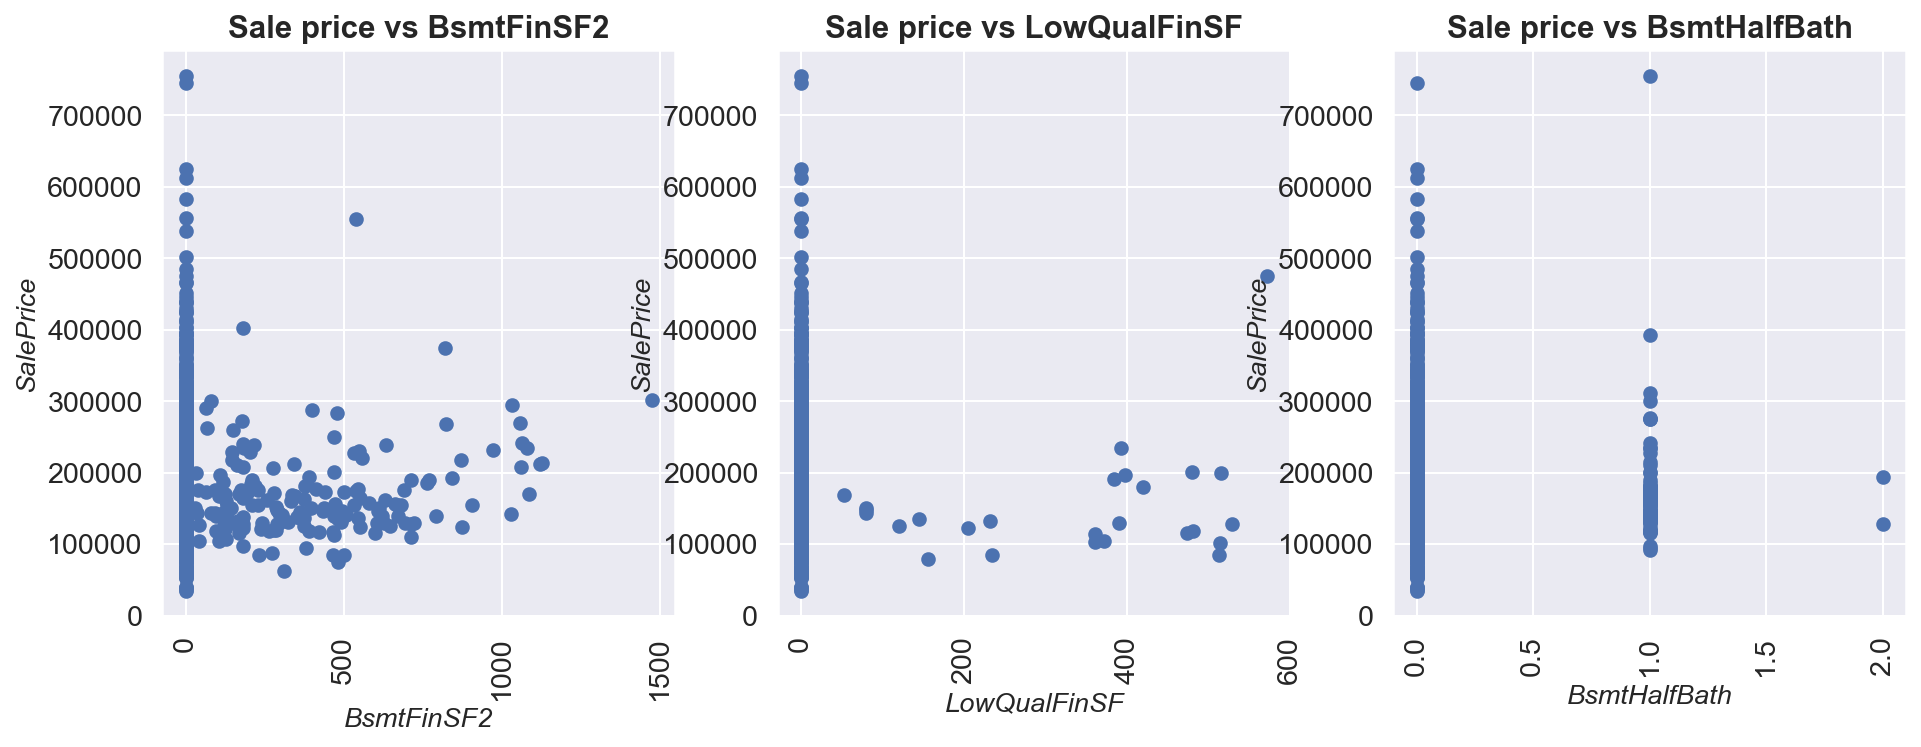

In [298]:
sct_plot('BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath')

Before  dropping lets find some new variables from existing which might be  helpful in prediction

### Feature Engineering

In [20]:
#creating new features form existing variable
housing_df1['AgeOfHouse'] = (housing_df1['YrSold'] - housing_df1['YearBuilt'])
housing_df1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

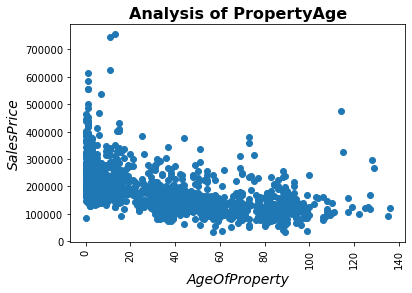

In [21]:
#sns.barplot('AgeOfHouse','SalePrice',data=housing_df)
plt.scatter('AgeOfHouse','SalePrice',data=housing_df1)
plt.ylabel('SalesPrice', fontsize= 14, fontstyle='italic')
plt.xlabel('AgeOfProperty', fontsize= 14, fontstyle='italic')
plt.xticks(rotation=90)
plt.title('Analysis of PropertyAge', fontsize=16, fontweight='bold')
plt.show()

From Above plat we can say as age increases Price decreses.

In [22]:
#deribving new features
def check_remodel(row):    
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0   
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1    
    else:
        return 2  
    
housing_df1['RemodelorNot'] = housing_df1.apply(check_remodel, axis=1)
housing_df1.head()  

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Derived new features AgeofProperty and RemodelorNot form existing features.

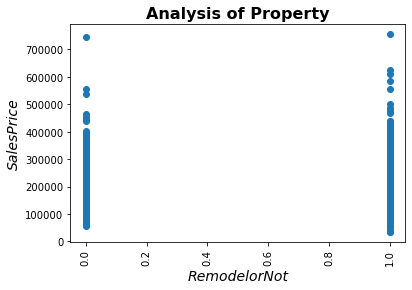

In [23]:
#sns.barplot('AgeOfHouse','SalePrice',data=housing_df)
plt.scatter('RemodelorNot','SalePrice',data=housing_df1)
plt.ylabel('SalesPrice', fontsize= 14, fontstyle='italic')
plt.xlabel('RemodelorNot', fontsize= 14, fontstyle='italic')
plt.xticks(rotation=90)
plt.title('Analysis of Property', fontsize=16, fontweight='bold')
plt.show()

In [24]:
#checkeing shape before droping variables
housing_df1.shape

(1460, 83)

In [25]:
#dropping catogorical variables having 80% same value
housing_df1 = housing_df1.drop(feature_coll, axis=1)
housing_df1.shape

(1460, 59)

In [27]:
#dropping numeric variables having 80% same value
housing_df1 = housing_df1.drop(feature_coll1, axis=1)
housing_df1.shape

(1460, 50)

In [28]:
#Drop these variables as these are not contributing much in prediction and some are highly corelated as we derived new feature out of them
housing_df1 = housing_df1.drop(['Id','YrSold','YearBuilt','MoSold','YearRemodAdd'], axis=1)

In [29]:
#checking shape after dropping
housing_df1.shape

(1460, 45)

In [ ]:

housing_df1.MSSubClass=housing_df1.MSSubClass.astype(str)

UniVariant Analysis of Catogorical variables.

In [187]:
def cat_plot(col1,col2,col3):
    
    plt.figure(figsize=(20,5))
    plt.subplot(1, 3, 1)
    ax = sns.countplot(x=col1, data=housing_df1)
    for i in ax.patches:
        
        ax.annotate('{:.2f}%'.format(100 * i.get_height()/len(housing_df1)), ((i.get_x() + i.get_width()), (i.get_height())),ha='right')
        #plt.title('Exterior2nd Data Distribution', fontsize=20)
        plt.ylabel('Frequency%', fontsize= 14, fontstyle='italic')
        plt.xticks(rotation=90)
        plt.title(col1+' Analysis', fontsize=16, fontweight='bold')
#plt.show()
    plt.subplot(1, 3, 2)
    ax = sns.countplot(x=col2, data=housing_df1)
    for i in ax.patches:
        
        ax.annotate('{:.2f}%'.format(100 * i.get_height()/len(housing_df1)), ((i.get_x() + i.get_width()), (i.get_height())),ha='right')
       
        plt.ylabel('Frequency%)', fontsize= 14, fontstyle='italic')
        plt.xticks(rotation=90)
        plt.title(col2+' Analysis', fontsize=16, fontweight='bold')
    plt.subplot(1, 3, 3)
    ax = sns.countplot(x=col3, data=housing_df1)
    for i in ax.patches:
        ax.annotate('{:.2f}%'.format(100 * i.get_height()/len(housing_df1)), ((i.get_x() + i.get_width()), (i.get_height())),ha='right')
        #plt.title('ExterQual Data Distribution', fontsize=20)
        plt.ylabel('Frequency%)', fontsize= 14, fontstyle='italic')
        plt.xticks(rotation=90)
        plt.title(col3+' Analysis', fontsize=16, fontweight='bold')
    plt.show()

In [553]:
housing_df1.select_dtypes(include='object').columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish'],
      dtype='object')

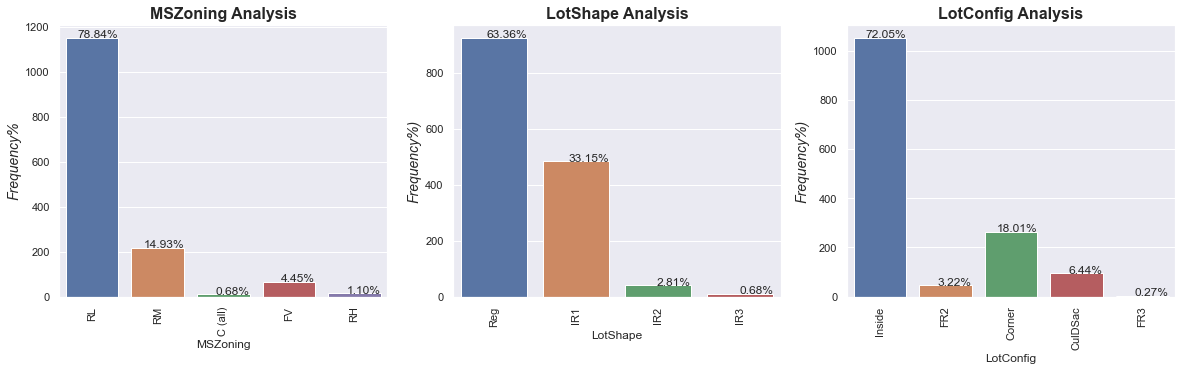

In [2098]:
cat_plot('MSZoning','LotShape','LotConfig')

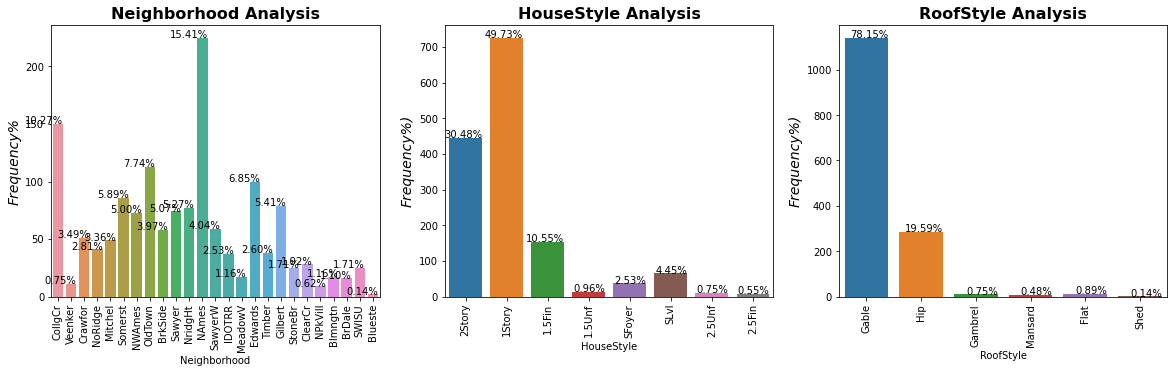

In [107]:
cat_plot('Neighborhood','HouseStyle','RoofStyle')

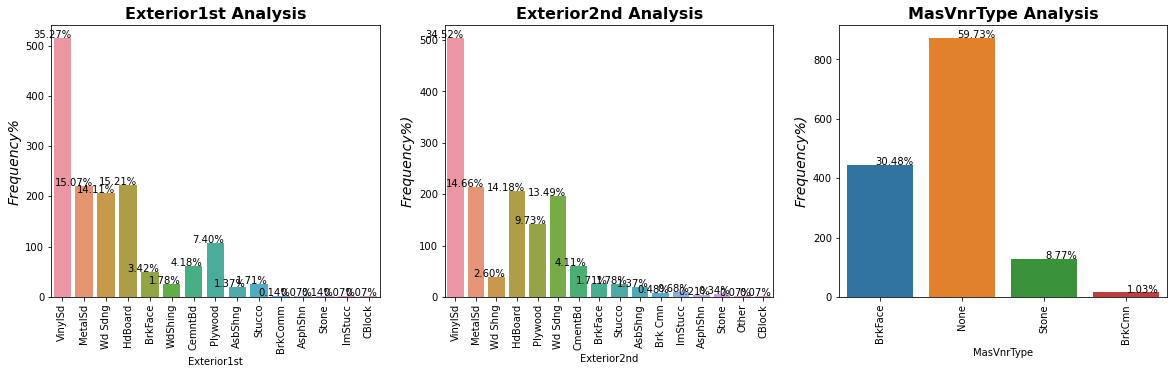

In [109]:
cat_plot('Exterior1st','Exterior2nd','MasVnrType')

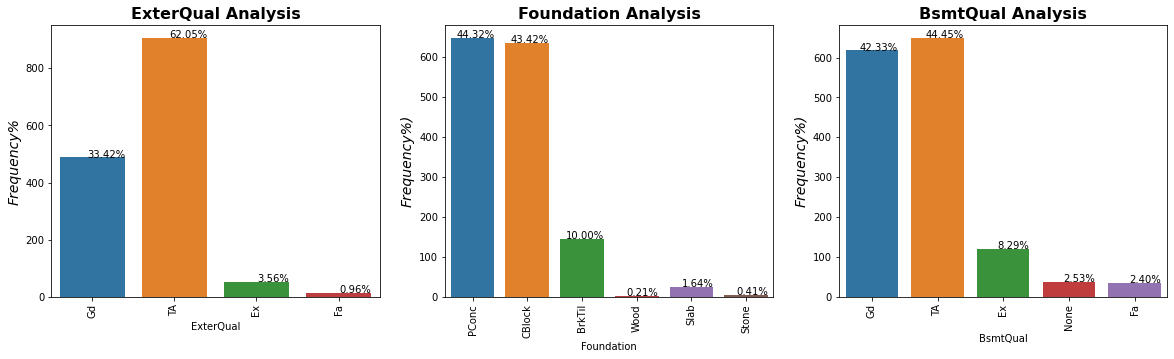

In [108]:
cat_plot('ExterQual','Foundation','BsmtQual')

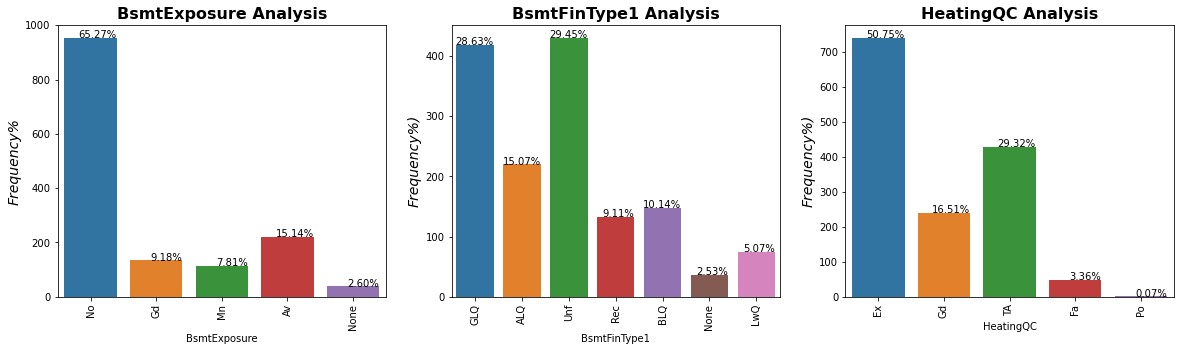

In [110]:
cat_plot('BsmtExposure','BsmtFinType1', 'HeatingQC')

BasementExposure: No Exposure,BasmentFinType1 as Unfinshed follwoed by Good Living Quarters and HeatingQc as Excellent 

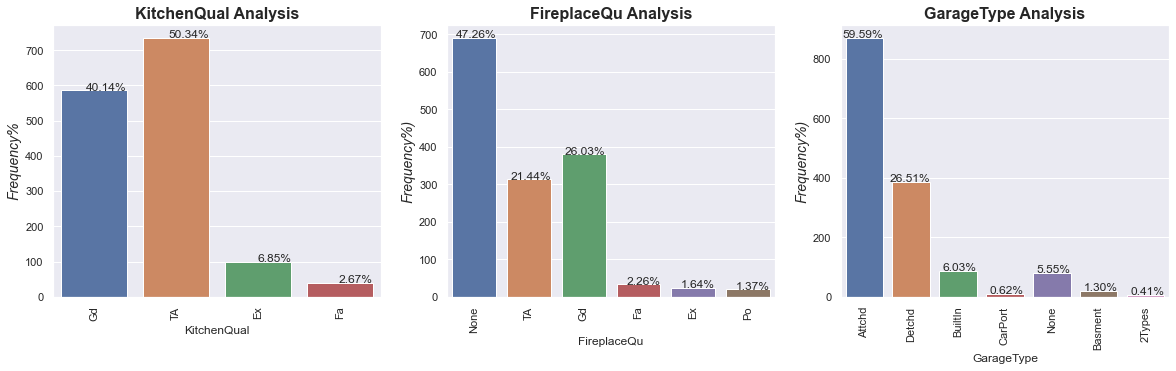

In [1960]:
cat_plot('KitchenQual', 'FireplaceQu', 'GarageType')

from above graph we can say Typical/Average  kitichenQul are preffered,Gragetye as attached and FirePlaceQu None.

from above univariant analysis of catogariacl variable we can conclue most preffered choice to predict Sale price are:-
MSZoning:Residential Low Density  78%
LotShape: Regular  63%
LotConfig: Inside 72%
Neighborhood: North Ames 15%
HouseStyle: 1stStory 50%
RoofStyle:Gable 78%
GarageType: Attached 60%
KitchenQual:Typical/Average 50%
FireplaceQu No: Feature unavailable
Exterior1st & Exterior2st:Vinyl Siding same  34%
BsmtExposure Feature not available
Foundation: Poured Concrete
BsmtFinType1: BsmtFinType1
HeatingQC: Excellent
 




Function to perform Univariant analysis for Numeric

In [554]:
def univar_fun (f1,f2,f3,f4,f5,f6):
    
    plt.figure(figsize=(20, 20))
    plt.subplot(5,3,1)
    sns.boxplot(y = f1, color='b', data = housing_df1)
    plt.subplot(5,3,2)
    sns.boxplot(y = f2, color='b', data = housing_df1)
    plt.subplot(5,3,3)
    sns.boxplot(y = f3, color='b', data = housing_df1)
    plt.subplot(5,3,4)
    sns.boxplot(y = f4, color='b', data = housing_df1)
    plt.subplot(5,3,5)
    sns.boxplot(y = f5, color='b', data = housing_df1)
    plt.subplot(5,3,6)
    sns.boxplot(y = f6, color='b', data = housing_df1)
    plt.show()

#### Analysis of target variable:-SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

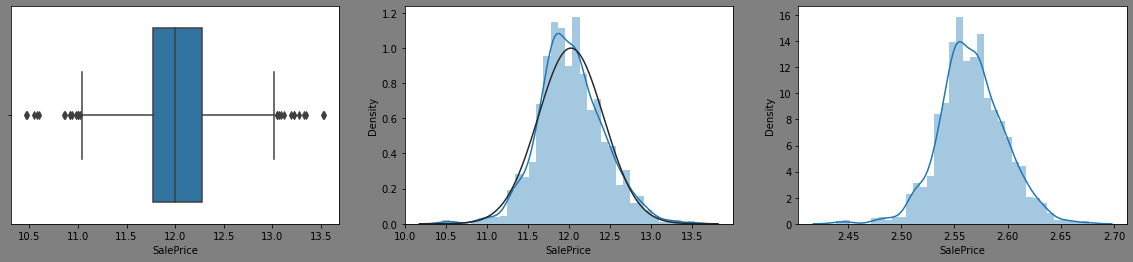

In [31]:
plt.figure(figsize=(20,4),facecolor='gray')
plt.subplot(1, 3, 1)
sns.boxplot('SalePrice',data =housing_df1)
#plt.title('SalePrice Distribution', fontsize=14, fontweight='bold')
plt.subplot(1, 3, 2)
sns.distplot(housing_df1['SalePrice'],fit=norm)
plt.subplot(1, 3, 3)
housing_df1['SalePrice']=np.log1p(housing_df1['SalePrice'])
sns.distplot(housing_df1['SalePrice'])

From above graph we can see that Sales price is not normally distributed skewed towards left,

so we applied the log transformation to obtain a normal distribution which we can see in 3rd plot

#### Univariant analysis of Numeric Variables.

In [32]:
num_var = housing_df1.select_dtypes(include = ['int64', 'float64'])

In [33]:
num_var.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'AgeOfHouse', 'RemodelorNot'],
      dtype='object')

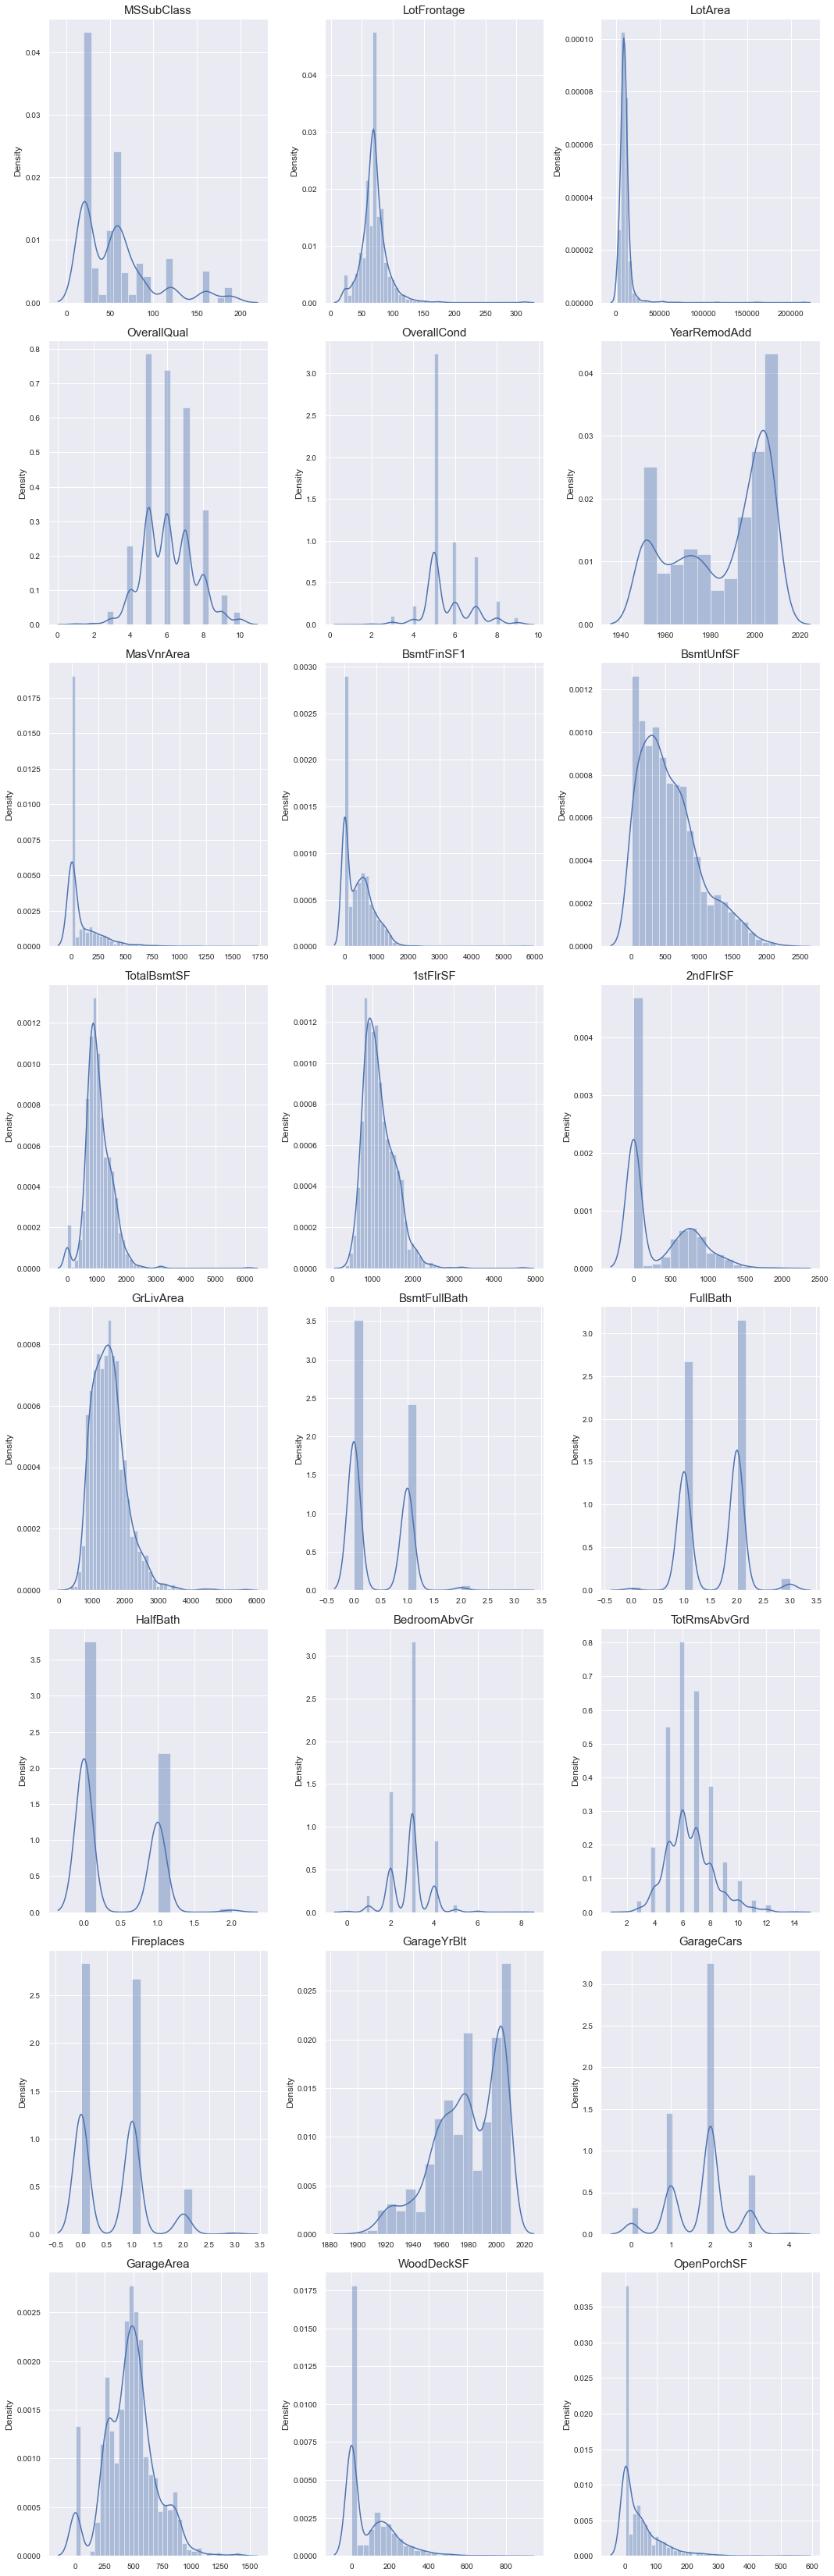

In [2827]:
fig, axes = plt.subplots(nrows =8 , ncols = 3, figsize = (15, 50))
for ax, column in zip(axes.flatten(), num_var.columns):
    sns.distplot(num_var[column].dropna(), ax = ax)
    ax.set_title(column, fontsize = 15)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 10)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

As we can see for few variable distribution is normal and for few scewed

Also clear that Outliers are present in some variables like-WoodDeckSF,OpenPorchSF,lotarea,TotalBsmtSF. we need to do outlier treatment.

Function to perform bivariant analysis

In [289]:
def bivariant_anyl(f1,f2,f3):
    plt.figure(figsize=(15,5), dpi=150)
    
    plt.subplot (131)
    plt.subplot(1,3,1)
    plt.scatter(x= housing_df1[f1], y= housing_df['SalePrice'])
    #sns.barplot(f1,'SalePrice',data=housing_df)
    plt.title(("Sale price vs "+f1))
    plt.xlabel(f1)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    plt.scatter(x= housing_df1[f2], y= housing_df['SalePrice'])
    #sns.barplot(f2,'SalePrice',data=housing_df)
    plt.title(("Sale price vs "+f2))
    plt.xlabel(f2)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=90)


    plt.subplot(1,3,3)
    plt.scatter(x= housing_df1[f3], y= housing_df['SalePrice'])
    #sns.barplot(f3,'SalePrice',data=housing_df)
    plt.title(("Sale price vs "+f3))
    plt.xlabel(f3)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=90)
    plt.show()

Bivariant Analysis 

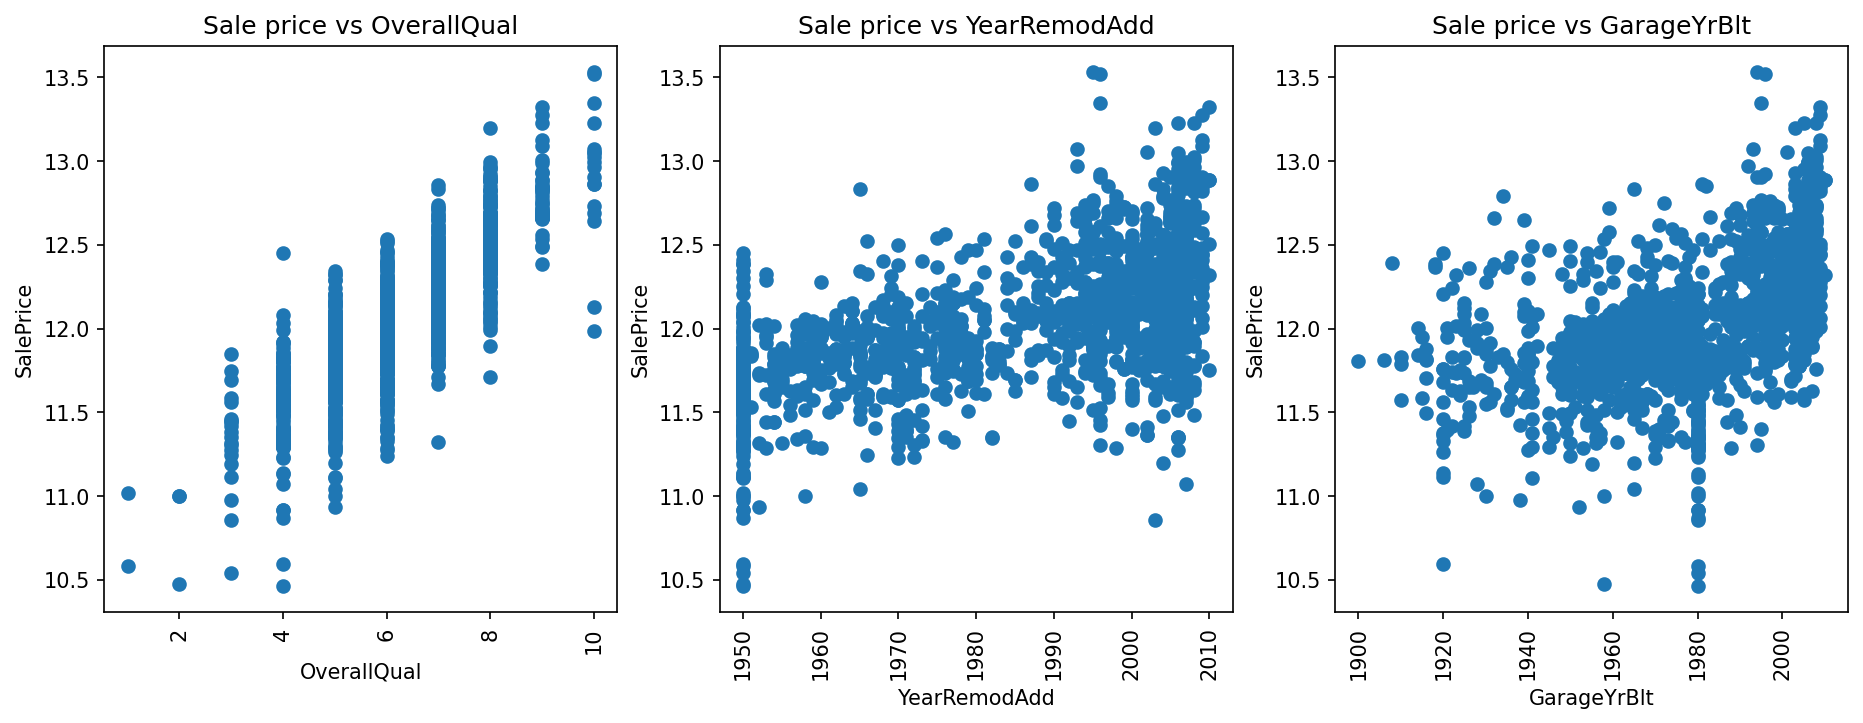

In [290]:
bivariant_anyl('OverallQual', 'YearRemodAdd','GarageYrBlt')

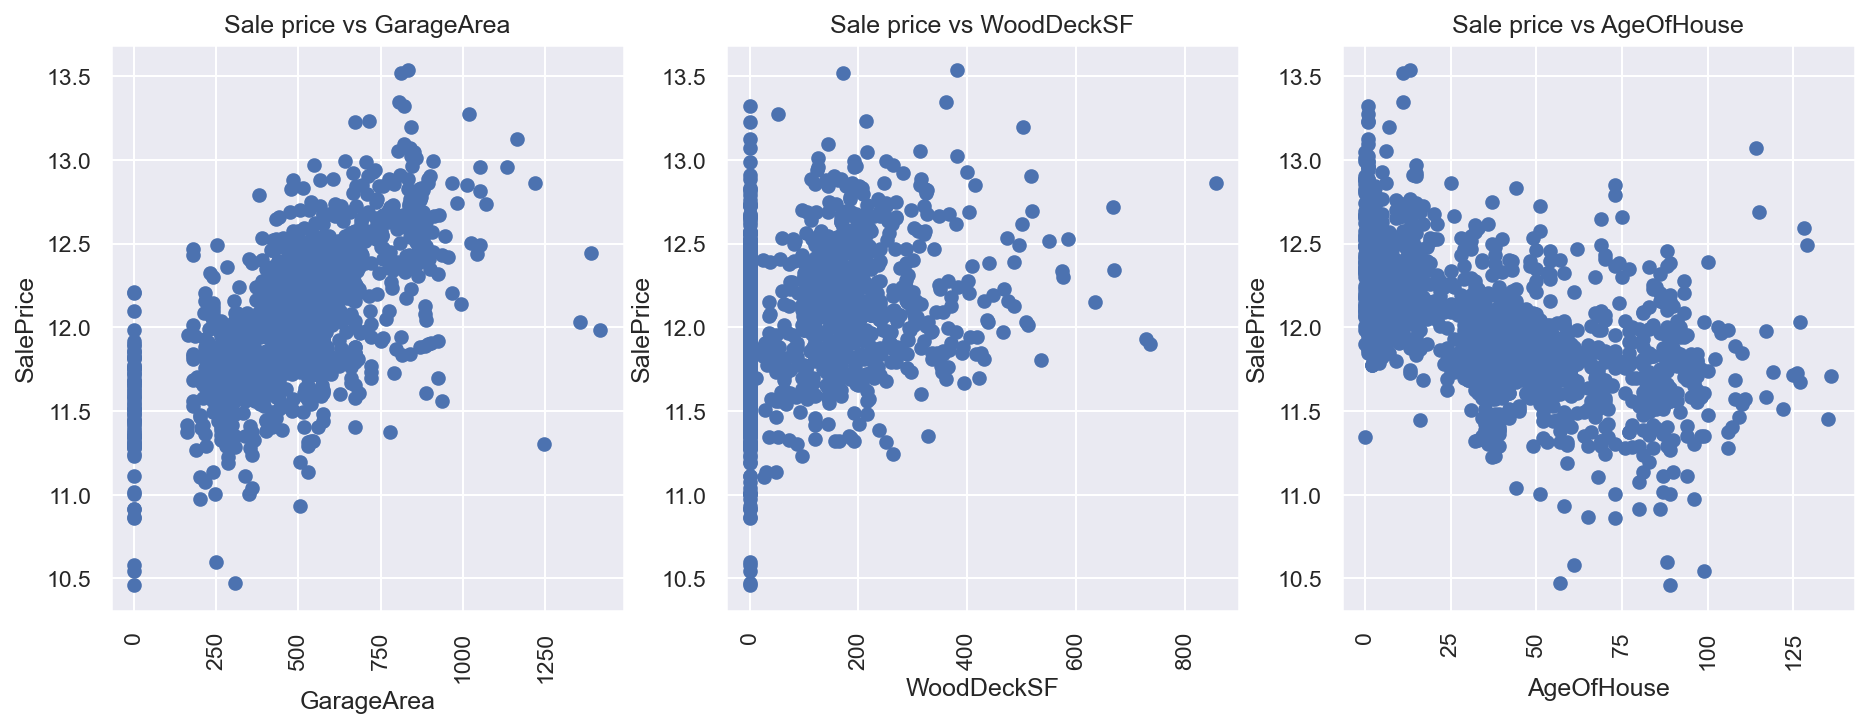

In [1975]:
bivariant_anyl('GarageArea', 'WoodDeckSF','AgeOfHouse')

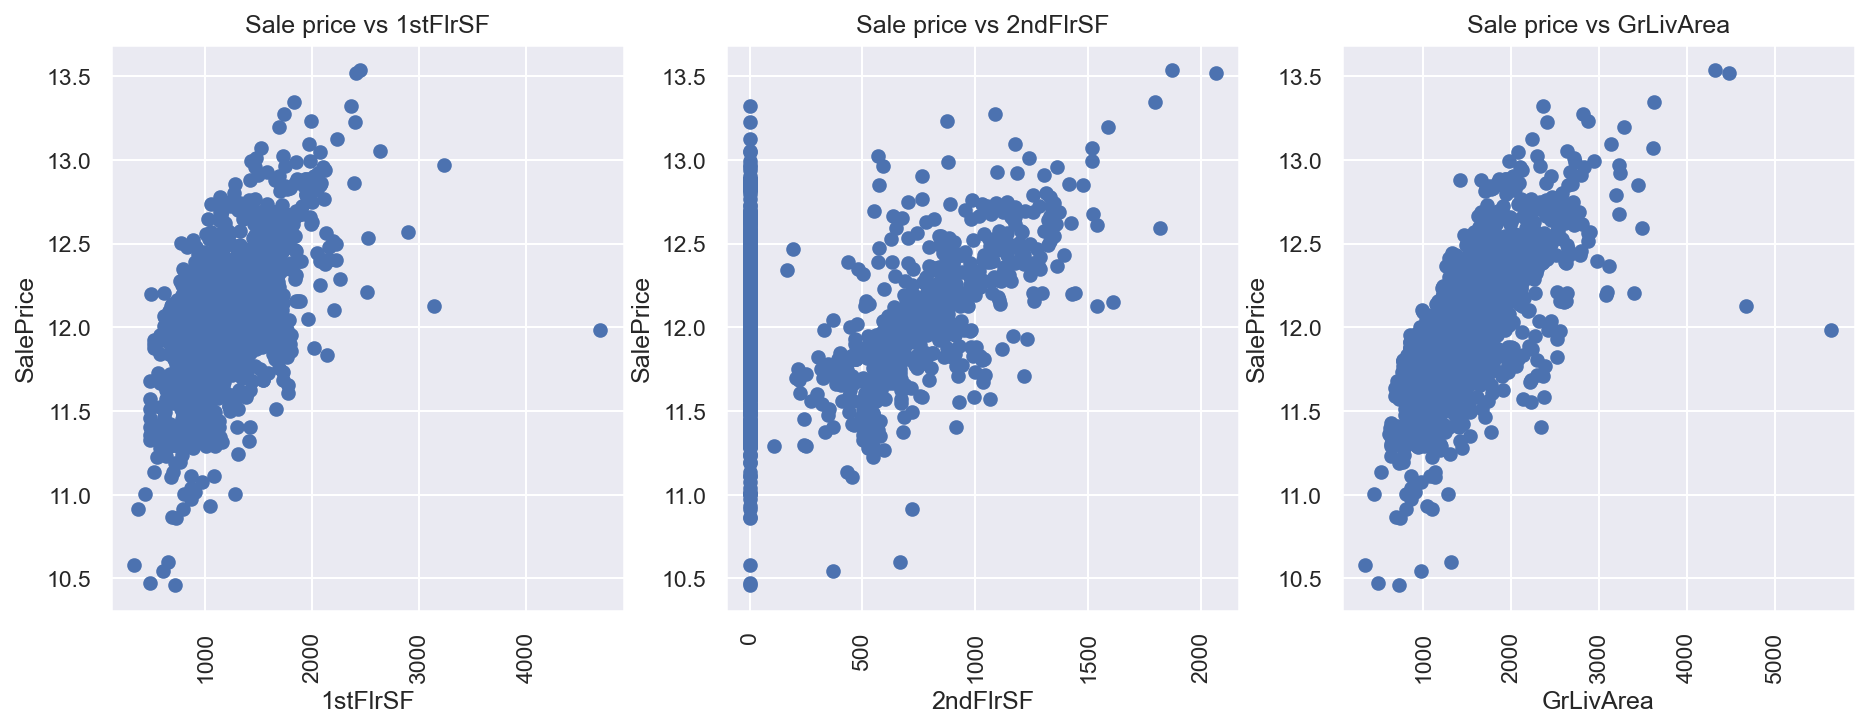

In [1973]:
bivariant_anyl('1stFlrSF','2ndFlrSF', 'GrLivArea')

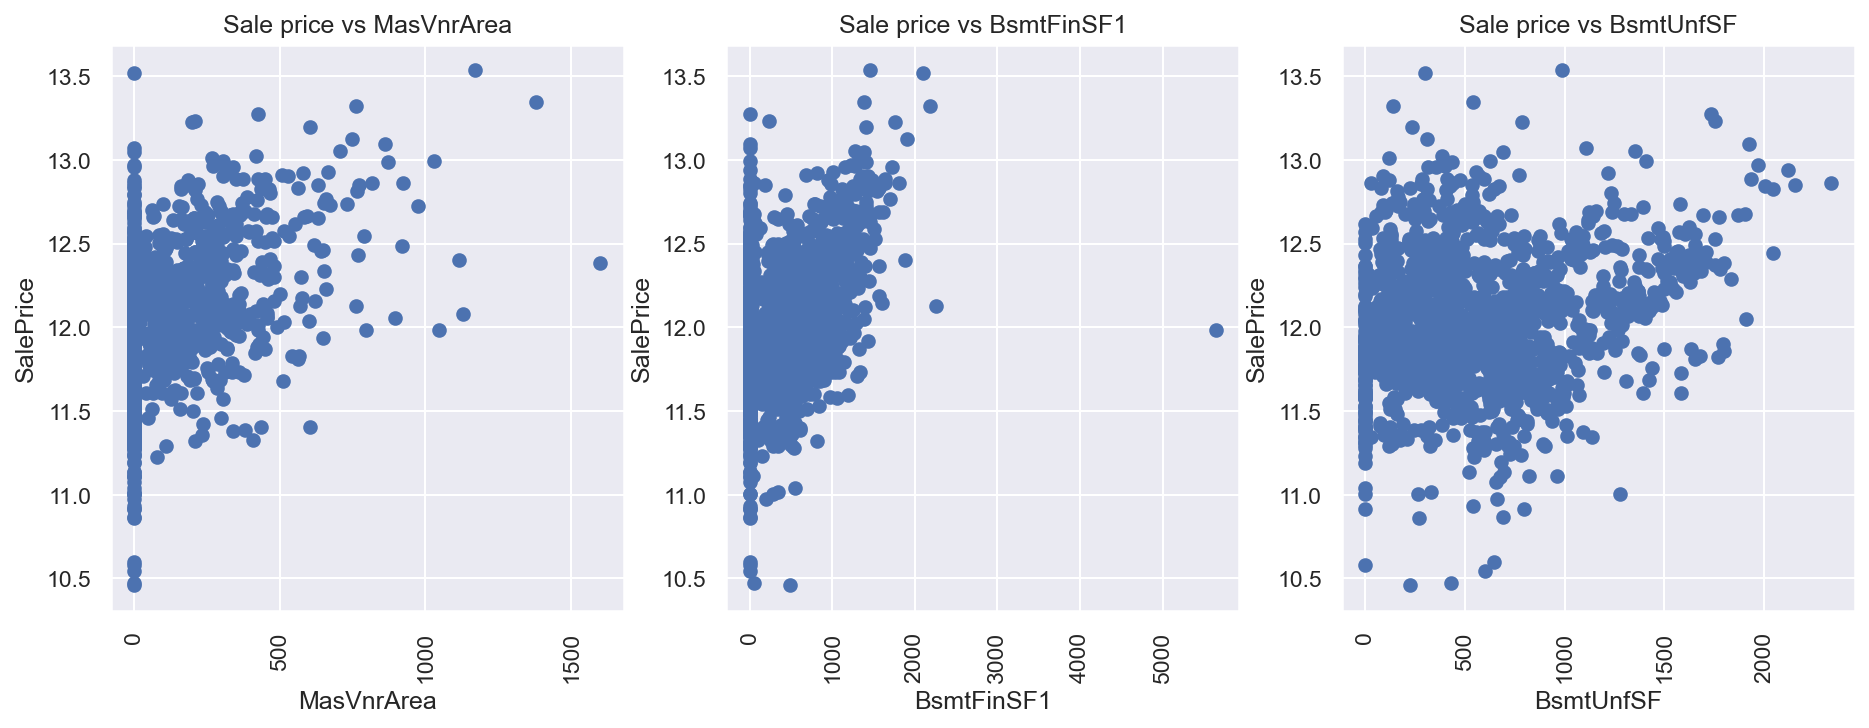

In [1972]:
bivariant_anyl('MasVnrArea','BsmtFinSF1', 'BsmtUnfSF')

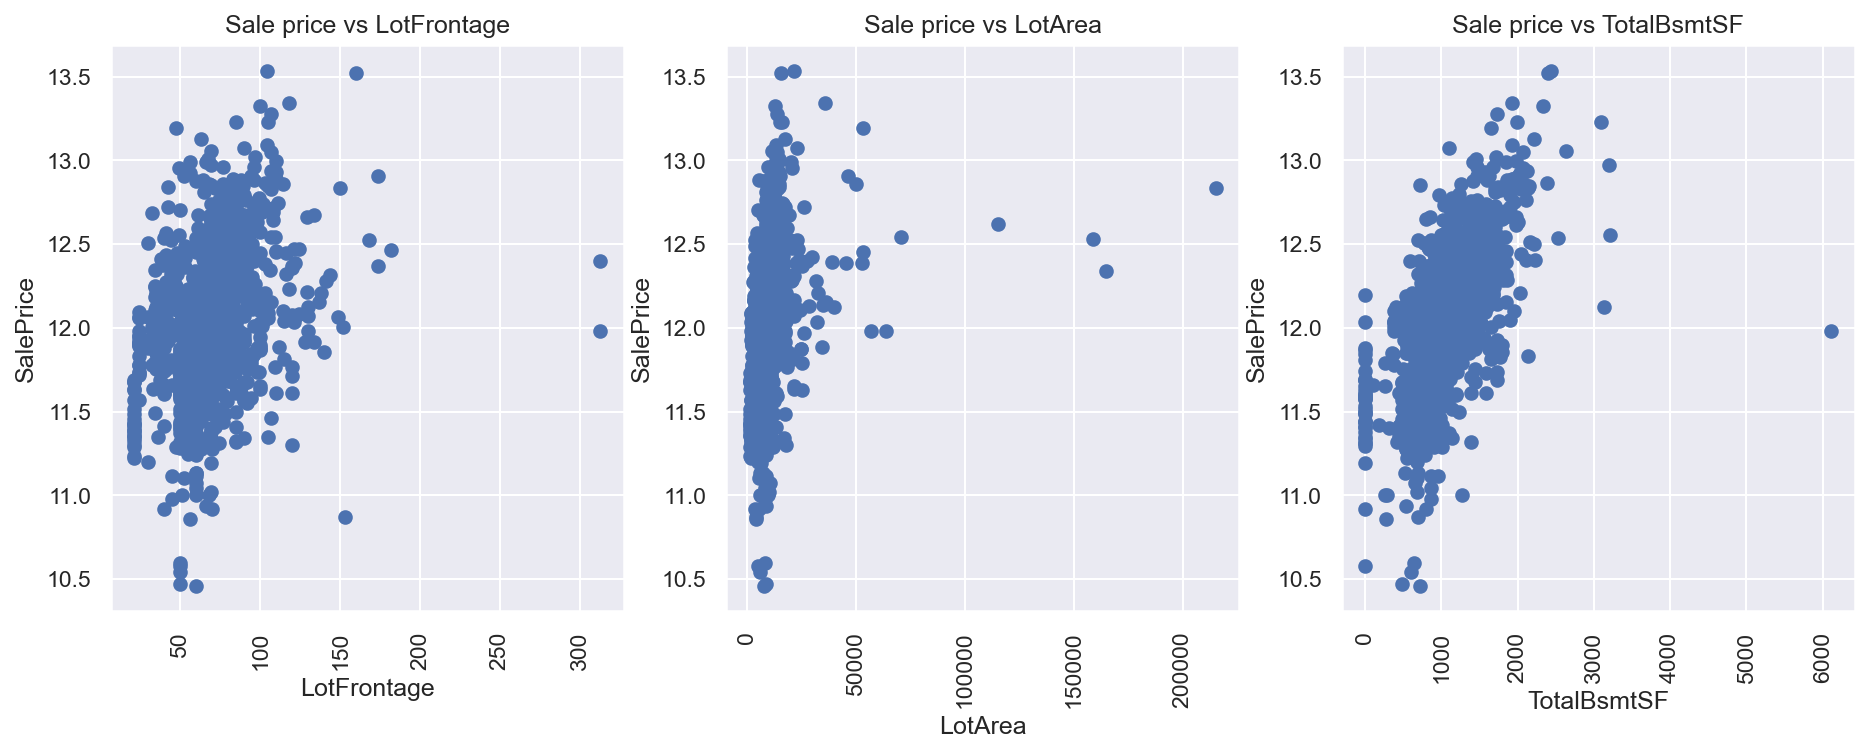

In [1971]:
bivariant_anyl('LotFrontage', 'LotArea','TotalBsmtSF')

For above graph we can conclude-
'1stFlrSF','GrLivArea','GrageArea' show a positive correlation with the SalePrice.AgeofProperty as nigative corelation. Other continuous variables are too scattered. 

#### Checking Outliers

In [291]:
housing_df1.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
10%      20.000000    49.000000    5000.000000     5.000000     5.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
98%     188.200000   120.820000   25251.620000     9.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
100%    190.000000   313.000000  215245.000000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    1984.865753   103.117123   443.639726   567.240411  1057.429452   
std       20.645407   180.731373   456.098091   441.866955   438.705324   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
10%     1950.000000     0.000000     0.000000    74.900000   636.900000   
25%     1967.000000     0.000000     0.000000   223.000000   795.750000   
50%     1994.000000     0.000000   383.500000   477.500000   991.500000   
75%     2004.000000   164.250000   712.250000   808.000000  1298.250000   
95%     2007.000000   456.000000  1274.000000  1468.000000  1753.000000   
98%     2008.000000   650.820000  1442.640000  1678.200000  2001.640000   
99%     2009.000000   791.280000  1572.410000  1797.050000  2155.050000   
100%    2010.000000  1600.000000  5644.000000  2336.000000  6110.000000   
max     2010.000000  1600.000000  5644.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF    GrLivArea  BsmtFullBath     FullBath  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1162.626712   346.992466  1515.463699      0.425342     1.565068   
std     386.587738   436.528436   525.480383      0.518911     0.550916   
min     334.000000     0.000000   334.000000      0.000000     0.000000   
10%     756.900000     0.000000   912.000000      0.000000     1.000000   
25%     882.000000     0.000000  1129.500000      0.000000     1.000000   
50%    1087.000000     0.000000  1464.000000      0.000000     2.000000   
75%    1391.250000   728.000000  1776.750000      1.000000     2.000000   
95%    1831.250000  1141.050000  2466.100000      1.000000     2.000000   
98%    2072.280000  1318.560000  2782.380000      1.000000     3.000000   
99%    2219.460000  1418.920000  3123.480000      2.000000     3.000000   
100%   4692.000000  2065.000000  5642.000000      3.000000     3.000000   
max    4692.000000  2065.000000  5642.000000      3.000000     3.000000   

          HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean      0.382877      2.866438      6.517808     0.613014  1978.589041   
std       0.502885      0.815778      1.625393     0.644666    23.997022   
min       0.000000      0.000000      2.000000     0.000000  1900.000000   
10%       0.000000      2.000000      5.000000     0.000000  1948.000000   
25%       0.000000      2.000000      5.000000     0.000000  1962.000000   
50%       0.000000      3.000000      6.000000     1.000000  1980.000000   
75%       1.000000      3.000000      7.000000     1.000000  2001.000000   
95%       1.000000      4.000000     10.000000     2.000000  2007.000000   
98%       1.000000      4.000000     10.820000     2.000000  2008.000000   
99%  

In [34]:
housing_df1.shape

(1460, 45)

In [780]:
#Removing outliers
#WoodDeckSF Removing value > 0.99
housing_df1 = housing_df1[housing_df1['WoodDeckSF'] < housing_df1['WoodDeckSF'].quantile(0.99)]
housing_df1.shape

(1445, 45)

In [781]:
#OpenPorchSF Removing value > 0.99
housing_df1 = housing_df1[housing_df1['OpenPorchSF'] < housing_df1['OpenPorchSF'].quantile(0.99)]
housing_df.shape

(1430, 45)

In [782]:
#TotalBsmtSF Removing value > 0.99
housing_df1 = housing_df1[housing_df1['TotalBsmtSF'] < housing_df['TotalBsmtSF'].quantile(0.99)]
housing_df.shape

(1414, 45)

In [783]:
#LotArea Removing value > 0.99
housing_df1 = housing_df1[housing_df1['LotArea'] < housing_df1['LotArea'].quantile(0.98)]
housing_df1.shape

(1385, 45)

In [784]:
# Determine the percentage of data retained

retained_data = round(100*(len(housing_df1)/1460),2)
print(retained_data,"%")

94.86 %


In [785]:
housing_df1=housing_df1.loc[~((housing_df1['SalePrice']<11.0) & (housing_df1['LotFrontage']>150))]

In [786]:
housing_df1.shape

(1384, 45)

In [787]:

housing_df1 = housing_df1.loc[~((housing_df1['SalePrice']>12.0) & (housing_df1['1stFlrSF']>2500))]
housing_df1.shape

(1383, 45)

In [788]:

housing_df1 = housing_df1.loc[~((housing_df1['SalePrice']<12.5) & (housing_df1['GarageArea']>1200))]
housing_df1.shape

(1381, 45)

In [789]:
housing_df1 = housing_df1.loc[~((housing_df1['SalePrice']>12.0) & (housing_df1['MasVnrArea']>1500))]
housing_df1.shape

(1380, 45)

In [790]:
new_retained_data = round(100*(len(housing_df1)/1460),2)
print(new_retained_data,"%")

94.52 %


Dataset contain outliers for few variables if we try to remove we will be sacrificing 6% of total data. No of recrds are already low
there is chances of over fitting so i decided to not go for outlier removal.

Function to check Variables correlation between them.

In [35]:
def check_col(df):
    
    Feature_corr = df.drop(['SalePrice'],axis =1)
    Feature_corr_matrix = Feature_corr.corr().abs()
    Feature_corr_matrix

    high_corr = Feature_corr_matrix.where(np.triu(np.ones(Feature_corr_matrix.shape), k=1).astype(np.bool))
    high_corr_features = [col for col in high_corr.columns if any(high_corr[col] > 0.70)]
    return high_corr_features

Below are few highly correlated fields lets confirm correlation from heat map and remove from dataset. 

In [36]:
high_corr_features=check_col(housing_df1)
high_corr_features

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [37]:
# correlation matrix
num_var = housing_df1.select_dtypes(exclude='object')
cor = num_var.corr()


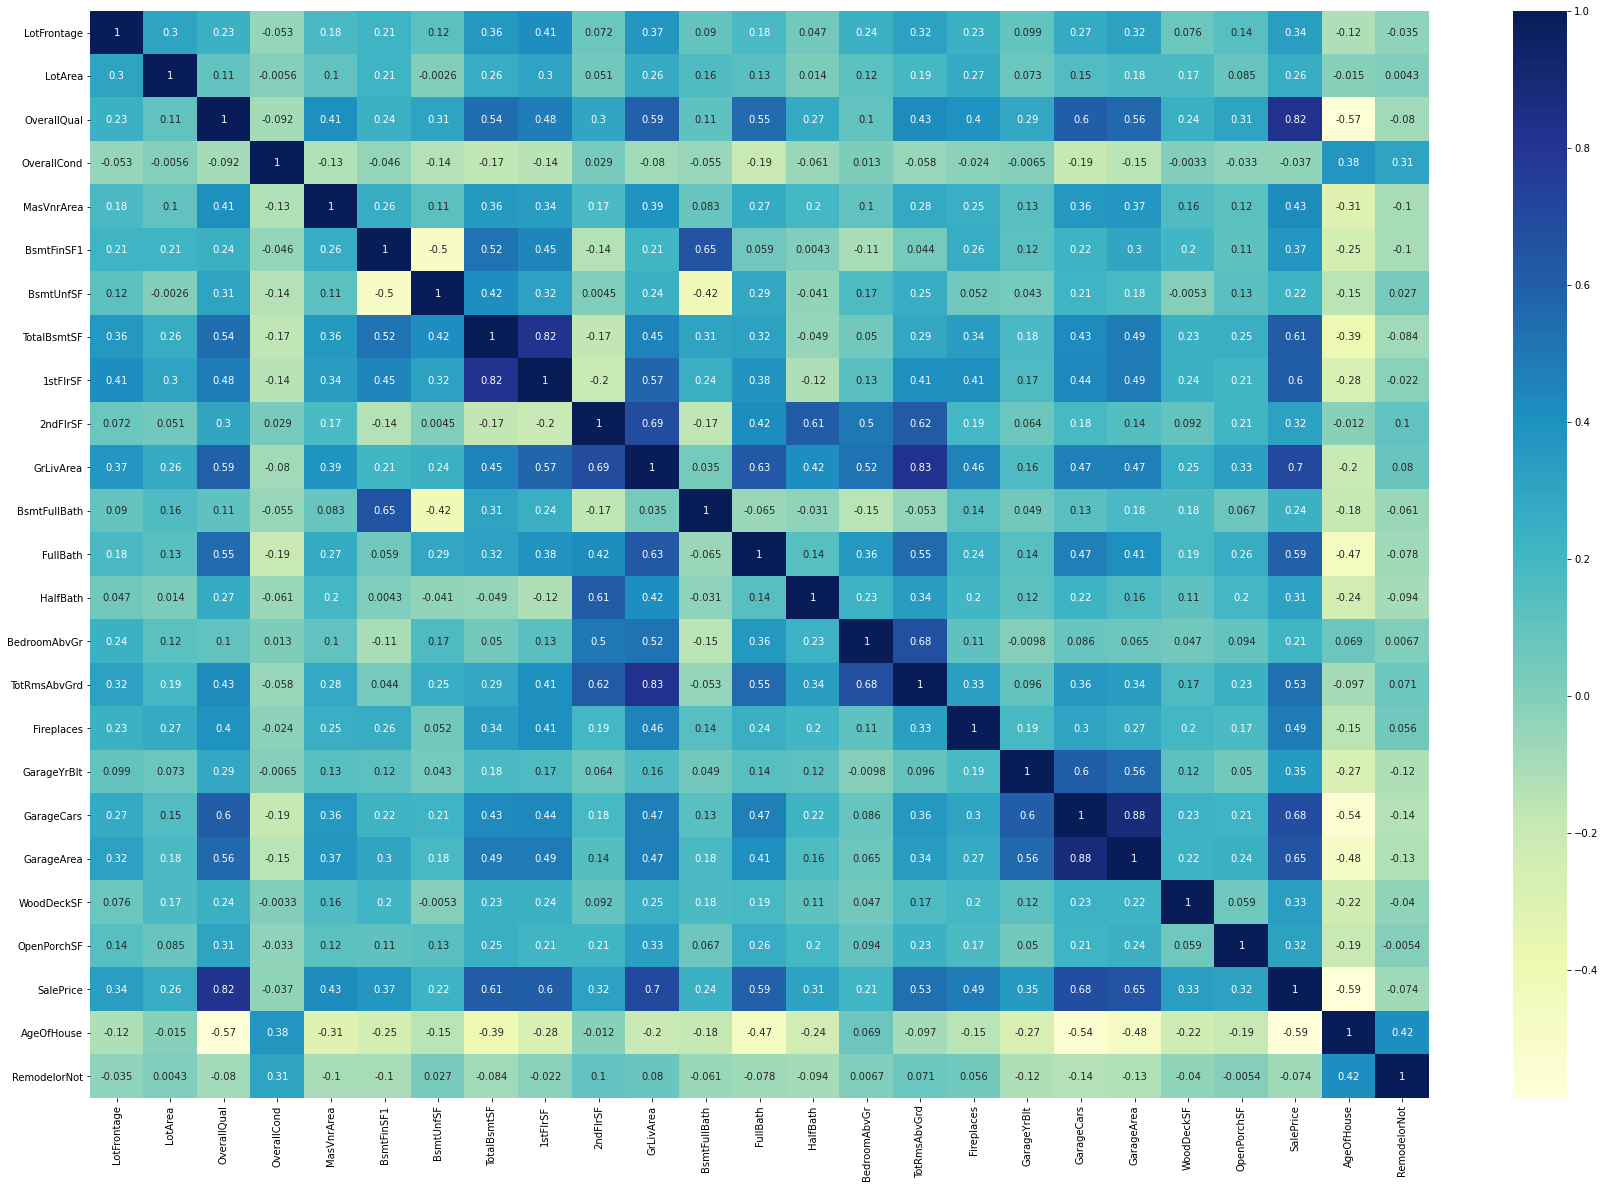

In [894]:
# checking correlation using heat map
plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Below variable are highly correlated:-
GrLivArea correlated to TotRmsAbvGrd 
1stFlrSF and TotalBsmtSF
GarageCars and  GarageArea

High correlation with SalePrice
OverallQual     0.79
GrLivArea       0.71
GarageCars      0.64
GarageArea      0.62
TotalBsmtSF     0.61
FullBath        0.56
1stFlrSF        0.61





Before deleting these variables first check the relation with salesprice.

Checking variation for numeric variable with Saleprice

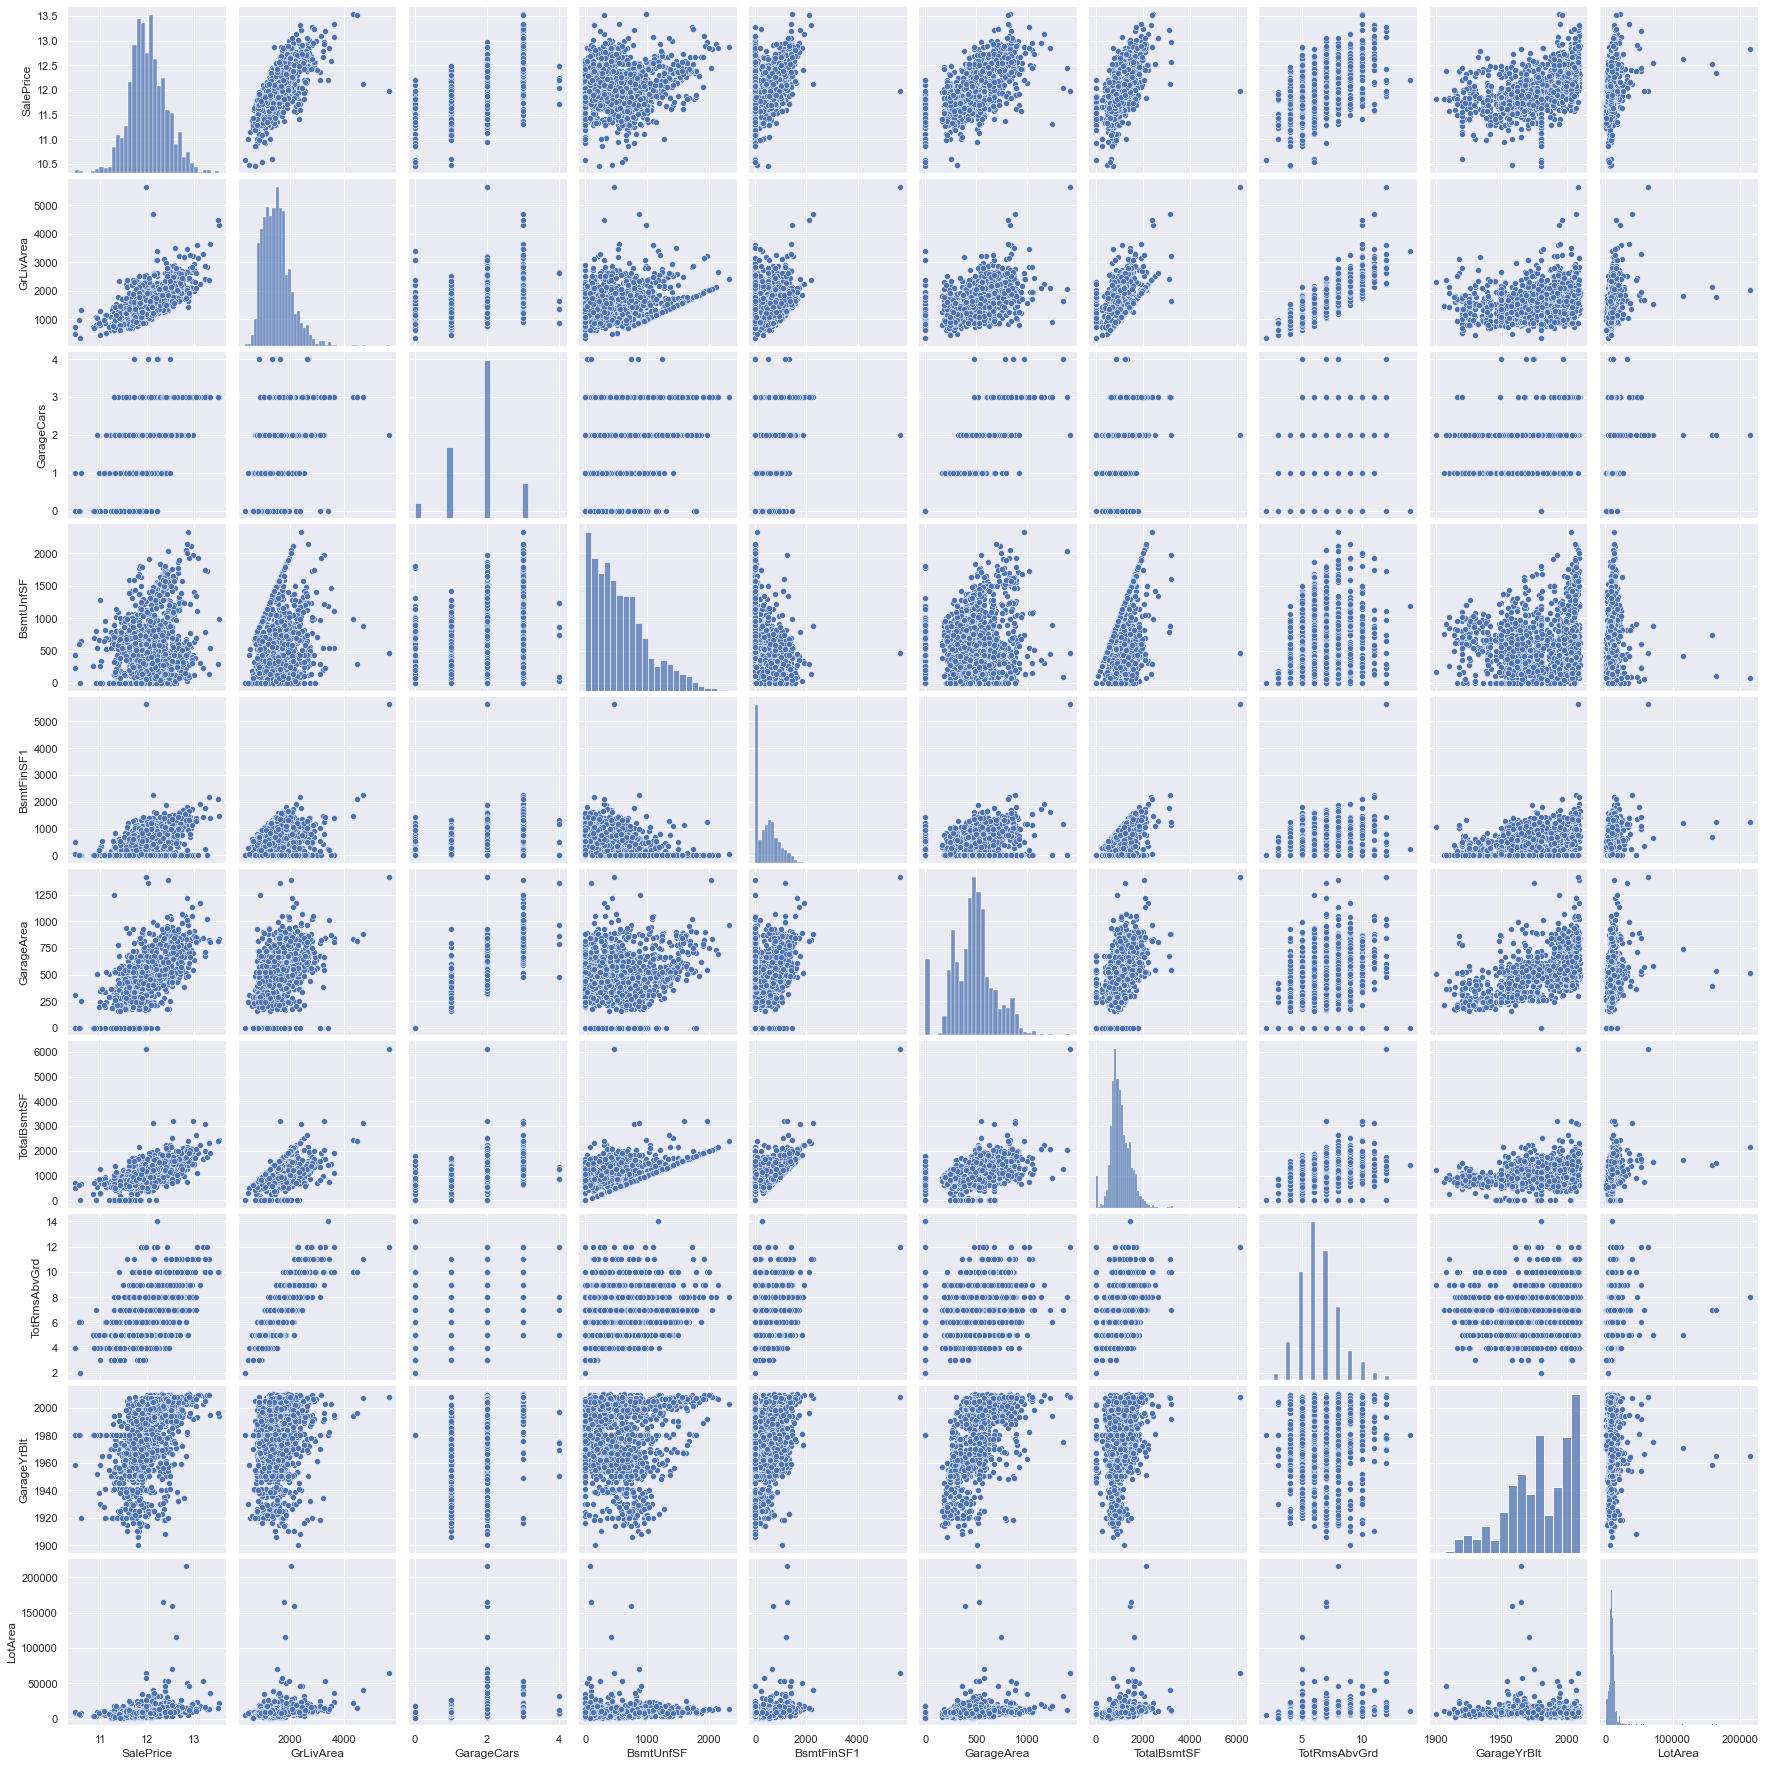

In [2436]:
#scatterplot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageYrBlt','LotArea']
sns.pairplot(housing_df1[cols], size = 2.5)
plt.show();

These correlated features are not contributing much in predecting salePrice. So dropping these variables.

In [38]:
housing_df1= housing_df1.drop(['TotRmsAbvGrd','1stFlrSF', 'GarageCars', '2ndFlrSF', ], axis = 1)
housing_df1.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr   
1         20       RL         80.0     9600      Reg       FR2      Veenker   
2         60       RL         68.0    11250      IR1    Inside      CollgCr   
3         70       RL         60.0     9550      IR1    Corner      Crawfor   
4         60       RL         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual Foundation BsmtQual BsmtExposure  \
0    BrkFace       196.0        Gd      PConc       Gd           No   
1       None         0.0        TA     CBlock       Gd           Gd   
2    BrkFace       162.0        Gd      PConc       Gd           Mn   
3       None         0.0        TA     BrkTil       TA           No   
4    BrkFace       350.0        Gd      PConc       Gd           Av   

  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  GrLivArea  \
0          GLQ         706        150          856        Ex       1710   
1          ALQ         978        284         1262        Ex       1262   
2          GLQ         486        434          920        Ex       1786   
3          ALQ         216        540          756        Gd       1717   
4          GLQ         655        490         1145        Ex       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  Fireplaces  \
0             1         2         1             3          Gd           0   
1             0         2         0             3          TA           1   
2             1         2         1             3          Gd           1   
3             1         1         0             3          Gd           1   
4             1         2         1             4          Gd           1   

  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageArea  WoodDeckSF  \
0        None     Attchd         2003          RFn         548           0   
1          TA     Attchd         1976          RFn         460         298   
2          TA     Attchd         2001          RFn         608           0   
3          Gd     Detchd         1998          Unf         642           0   
4          TA     Attchd         2000          RFn         836         192   

   OpenPorchSF  SalePrice  AgeOfHouse  RemodelorNot  
0           61   2.583824           5             0  
1            0   2.573300          31             0  
2           42   2.589054           7             1  
3           35   2.553297          91             1  
4           84   2.597433           8             0

In [49]:
housing_df1.shape

(1460, 41)

### Data Prepration

Encoding for categorical varaiables- If we check data dictonary for few variables we can assign order

In [39]:
housing_df1['GarageFinish'] = housing_df1['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_df1['BsmtExposure'] = housing_df1['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_df1['BsmtFinType1'] = housing_df1['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
housing_df1['LotShape'] = housing_df1['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) 
housing_df1['ExterQual'] = housing_df1['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_df1['BsmtQual'] = housing_df1['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df1['HeatingQC'] = housing_df1['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df1['KitchenQual'] = housing_df1['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_df1['FireplaceQu'] = housing_df1['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

In [40]:
#checking catogorical variables
housing_df1.select_dtypes(include='object').columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'GarageType'],
      dtype='object')

In [42]:
#Creating dummy variables
list_cat=housing_df1[['LotConfig','Neighborhood','MSZoning','Exterior2nd','MSSubClass','HouseStyle'
           ,'Foundation','MasVnrType','RoofStyle','Exterior1st',
          'GarageType']]
list_dummy = pd.get_dummies(list_cat,drop_first=True)

In [43]:
list_dummy.head()

LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
0                     0                    0                     0   
1                     0                    0                     1   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Exterior2nd_AsphShn  \
0            0            0            1            0                    0   
1            0            0            1            

In [44]:
#concatinating dummy variables to main dataset
housing_df1 = pd.concat([housing_df1,list_dummy], axis = 1)

In [45]:
#checking shape after adding dummies to main dataset
housing_df1.shape

(1460, 142)

In [46]:
housing_df1.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape LotConfig Neighborhood  \
0         60       RL         65.0     8450         3    Inside      CollgCr   
1         20       RL         80.0     9600         3       FR2      Veenker   
2         60       RL         68.0    11250         2    Inside      CollgCr   
3         70       RL         60.0     9550         2    Corner      Crawfor   
4         60       RL         84.0    14260         2       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  \
0    BrkFace       196.0          4      PConc         4             1   
1       None         0.0          3     CBlock         4             4   
2    BrkFace       162.0          4      PConc         4             2   
3       None         0.0          3     BrkTil         3             1   
4    BrkFace       350.0          4      PConc         4             3   

   BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  GrLivArea  \
0             6         706        150          856          5       1710   
1             5         978        284         1262          5       1262   
2             6         486        434          920          5       1786   
3             5         216        540          756          4       1717   
4             6         655        490         1145          5       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  \
0             1         2         1             3            4           0   
1             0         2         0             3            3           1   
2             1         2         1             3            4           1   
3             1         1         0             3            4           1   
4             1         2         1             4            4           1   

   FireplaceQu GarageType  GarageYrBlt  GarageFinish  GarageArea  WoodDeckSF  \
0            0     Attchd         2003             2         548           0   
1            3     Attchd         1976             2         460         298   
2            3     Attchd         2001             2         608           0   
3            4     Detchd         1998             1         642           0   
4            3     Attchd         2000             2         836         192   

   OpenPorchSF  SalePrice  AgeOfHouse  RemodelorNot  LotConfig_CulDSac  \
0           61   2.583824           5             0                  0   
1            0   2.573300          31             0                  0   
2           42   2.589054           7             1                  0   
3           35   2.553297          91             1                  0   
4           84   2.597433           8             0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
0              0              0                 1                     0   
1              1              0                 0                     0   
2              0              0                 1                     0   
3              0              0                 0                     0   
4              1              0                 0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0        

In [47]:
#deleting features for which dummies are created
housing_df1.drop(['LotConfig','Neighborhood','MSZoning','Exterior2nd','HouseStyle'
           ,'Foundation','MasVnrType','RoofStyle','Exterior1st','MSSubClass',
          'GarageType'], axis=1, inplace=True)

In [48]:
#checking shape
housing_df1.shape

(1460, 131)

In [60]:
#finding highly corelated variables
high_corr_features1=check_col(housing_df1)
high_corr_features1

['ExterQual',
 'KitchenQual',
 'FireplaceQu',
 'MSZoning_FV',
 'MSZoning_RM',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'Foundation_PConc',
 'MasVnrType_None',
 'RoofStyle_Hip',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'GarageType_Detchd',
 'GarageType_None']

In [61]:
##Dropping independent predictors highly correlated to each other
housing_df1 = housing_df1.drop(high_corr_features1, axis=1)

In [49]:
housing_df1.shape

(1460, 131)

In [50]:
#checking binary variables
def finf_cat(df):
    cat_df = housing_df1.copy()
    catvar = (cat_df.nunique()==2)
    catvar_list = list(catvar[catvar.values==True].index)
    return catvar_list

list_cag = finf_cat(housing_df1)
print(list_cag)

['RemodelorNot', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2n

In [51]:
#checking dataset
housing_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 131 entries, LotFrontage to GarageType_None
dtypes: float64(3), int32(1), int64(26), uint8(101)
memory usage: 480.6 KB


In [52]:
#copying data into new dataset for feature use
housing_data_df = housing_df1.copy()

In [53]:
#checking shape
housing_data_df.shape

(1460, 131)

<Figure size 1440x1200 with 0 Axes>

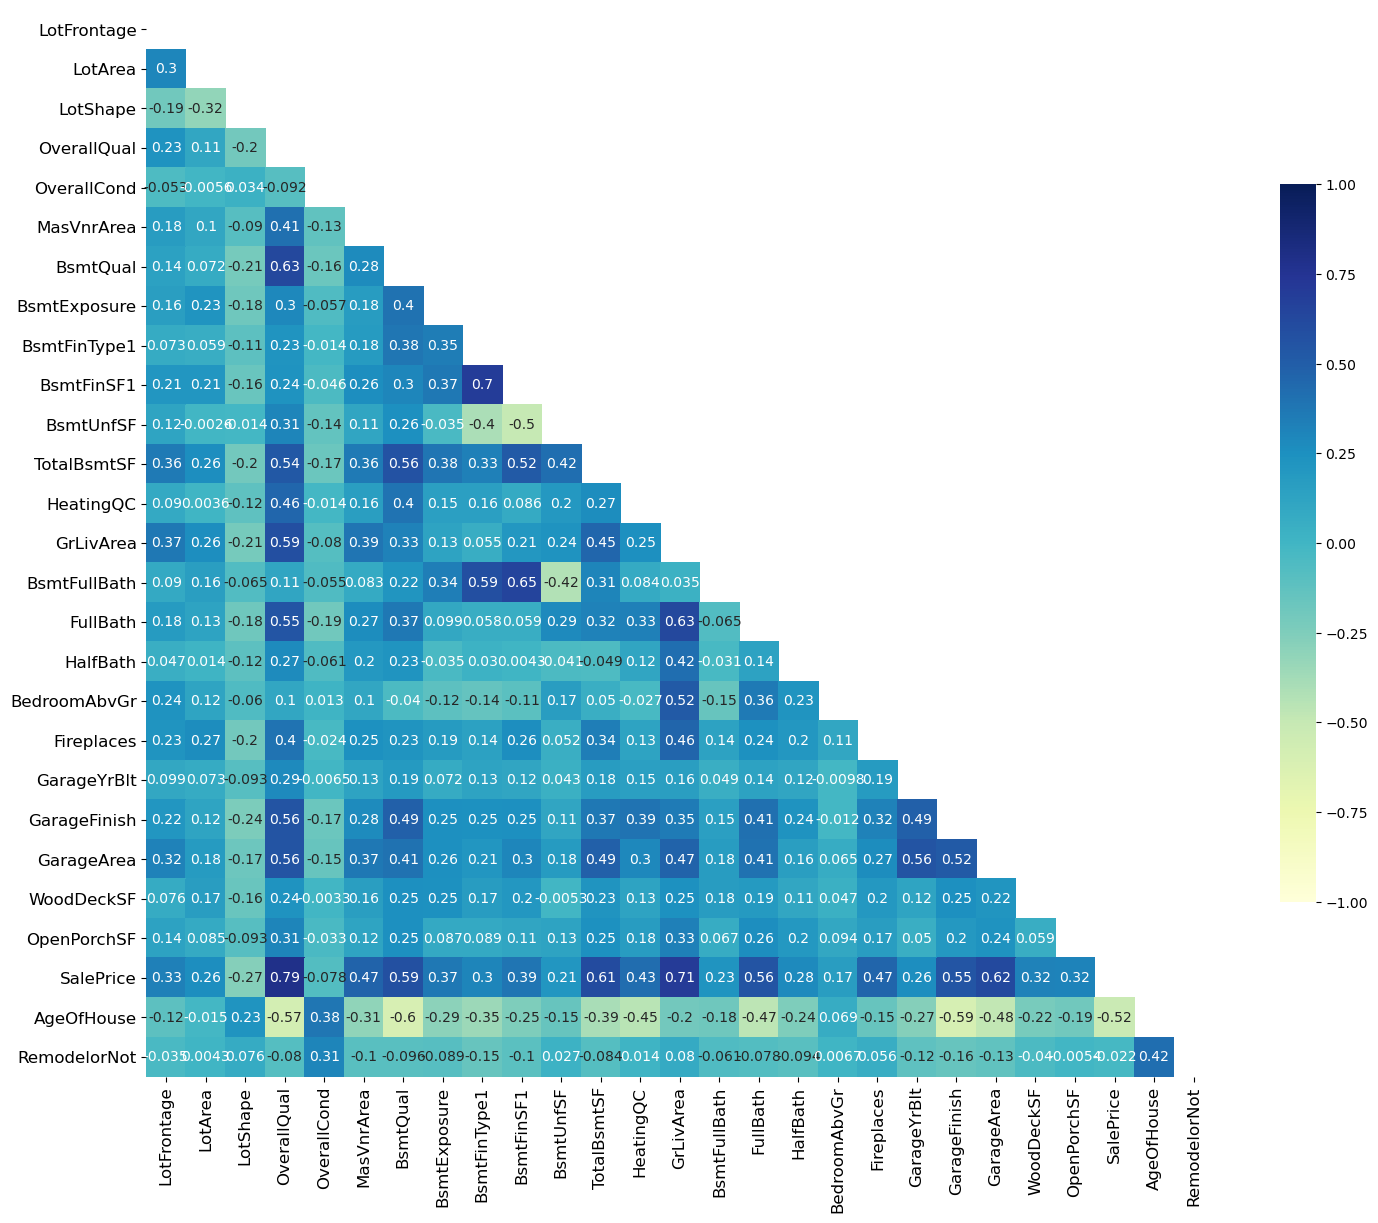

In [75]:
#Rechecking the heatmap to understand correlation amongst all numeric variables (ignore the categorical numeric ones)
numeric_vars1= housing_data_df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new1 = housing_data_df[numeric_vars1].corr()
my_mask_2 = np.triu(np.ones_like(corr_matrix_new1, dtype=np.bool))
f, ax_corr2 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr2 = sns.heatmap(corr_matrix_new1, cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=my_mask_2, annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.autoscale()
plt.show()

In [ ]:
We can see few highly corelated variables prest in dataset,will remove using RFE

### Split into train and test

In [54]:
X = housing_df1.drop(['SalePrice'], axis=1)
X.head()

LotFrontage  LotArea  LotShape  OverallQual  OverallCond  MasVnrArea  \
0         65.0     8450         3            7            5       196.0   
1         80.0     9600         3            6            8         0.0   
2         68.0    11250         2            7            5       162.0   
3         60.0     9550         2            7            5         0.0   
4         84.0    14260         2            8            5       350.0   

   ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  \
0          4         4             1             6         706        150   
1          3         4             4             5         978        284   
2          4         4             2             6         486        434   
3          3         3             1             5         216        540   
4          4         4             3             6         655        490   

   TotalBsmtSF  HeatingQC  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0          856          5       1710             1         2         1   
1         1262          5       1262             0         2         0   
2          920          5       1786             1         2         1   
3          756          4       1717             1         1         0   
4         1145          5       2198             1         2         1   

   BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  GarageYrBlt  \
0             3            4           0            0         2003   
1             3            3           1            3         1976   
2             3            4           1            3         2001   
3             3            4           1            4         1998   
4             4            4           1            3         2000   

   GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  AgeOfHouse  \
0             2         548           0           61           5   
1             2         460         298            0          31   
2             2         608           0           42           7   
3             1         642           0           35          91   
4             2         836         192           84           8   

   RemodelorNot  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0             0                  0              0              0   
1             0                  0              1              0   
2             1                  0              0              0   
3             1                  0              0              0   
4             0                  0              1              0   

   LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 1                     0                    0   
1                 0                     0                    0   
2                 1                     0                    0   
3                 0                     0                    0   
4                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1             

In [55]:
X.shape

(1460, 130)

In [56]:
# Putting response variable to y
y = housing_df1['SalePrice']
print(y.head())
print(y.shape)

0    2.583824
1    2.573300
2    2.589054
3    2.553297
4    2.597433
Name: SalePrice, dtype: float64
(1460,)


### Scaling Features

In [57]:
# scaling the features - necessary before model building to bring all variable at common scale
from sklearn.preprocessing import scale
cols = X.columns
#Scaling variables using Scale as there are outlies present in data
X = pd.DataFrame(scale(X))
X.columns = cols

X.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=130)

In [58]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#### Model Building and Evaluation

### RFE 

In [59]:
#Using RFE to select top 40 features and check
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 40)            
rfe = rfe.fit(X_train, y_train)

In [60]:
#top 40 features
col1 = X_train.columns[rfe.support_]
col1.shape

(40,)

In [61]:
#stroring top 40 features 
X_train_rfe = X_train[col1]

In [62]:
X_train_rfe.head()

LotFrontage   LotArea  OverallQual  OverallCond  BsmtQual  BsmtExposure  \
210     -0.130049 -0.492374    -0.795151     0.381743 -0.558153     -0.590555   
318      0.914450 -0.061820     0.651479    -0.517200  0.583168      2.220999   
239     -0.811244 -0.177977    -0.071836    -1.416142 -0.558153     -0.590555   
986     -0.493353 -0.521839    -0.071836     2.179628 -0.558153     -0.590555   
1416    -0.447940  0.082500    -1.518467     0.381743 -0.558153     -0.590555   

      BsmtFinType1  HeatingQC  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
210      -0.259078  -1.193952  -1.240174      1.107810 -1.026041 -0.761621   
318       1.164712   0.891179   2.152171      1.107810  0.789741  1.227585   
239      -0.733674  -1.193952  -0.054186     -0.819964 -1.026041  1.227585   
986      -1.208270  -0.151386   0.227558     -0.819964 -1.026041 -0.761621   
1416     -1.208270  -0.151386   1.474464     -0.819964  0.789741 -0.761621   

      BedroomAbvGr  KitchenQual  FireplaceQu  GarageYrBlt  GarageFinish  \
210      -1.062465    -0.771091    -1.008334    -4.120324     -1.922359   
318       1.390023     0.735994     0.648890     0.273977      0.318475   
239       0.163779    -0.771091     1.201298     0.176963     -0.801942   
986      -1.062465     0.735994    -1.008334     0.179168     -0.801942   
1416      1.390023    -0.771091    -1.008334     0.225470     -0.801942   

      GarageArea  AgeOfHouse  Neighborhood_ClearCr  Neighborhood_Crawfor  \
210    -2.212963    1.536124             -0.139832             -0.190252   
318     0.856307   -0.679500             -0.139832             -0.190252   
239    -1.183635    0.940881             -0.139832             -0.190252   
986    -1.019878    1.966021             -0.139832             -0.190252   
1416    0.407146    2.925022             -0.139832             -0.190252   

      Neighborhood_Edwards  Neighborhood_MeadowV  Neighborhood_NoRidge  \
210               3.687818              -0.10854             -0.169981   
318              -0.271163              -0.10854              5.883006   
239               3.687818              -0.10854             -0.169981   
986              -0.271163              -0.10854             -0.169981   
1416             -0.271163              -0.10854             -0.169981   

      Neighborhood_NridgHt  Neighborhood_Somerst  Neighborhood_StoneBr  \
210              -0.235958             -0.250182             -0.131991   
318              -0.235958             -0.250182             -0.131991   
239              -0.235958             -0.250182             -0.131991   
986              -0.235958             -0.250182             -0.131991   
1416             -0.235958             -0.250182             -0.131991   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Exterior2nd_CmentBd  \
210     -0.215859    -0.105263     0.518133    -0.418955             -0.20702   
318     -0.215859    -0.105263     0.518133    -0.418955             -0.20702   
239     -0.215859    -0.105263     0.518133    -0.418955             -0.20702   
986     -0.215859    -0.105263    -1.930005     2.386891             -0.20702   
1416    -0.215859    -0.105263    -1.930005     2.386891             -0.20702   

      MSSubClass_160  MSSubClass_20  MSSubClass_50  MSSubClass_70  \
210         -0.21236      -0.761634      -0.330791       -0.20702   
318         -0.21236      -0.761634      -0.330791       -0.20702   
239         -0.21236      -0.761634       3.023060       -0.20702   
986         -0.21236      -0.761634       3.023060       -0.20702   
1416        -0.21236      -0.761634      -0.330791       -0.20702   

      Exterior1st_BrkFace  Exterior1st_CemntBd  GarageType_Attchd  \
210             -0.188311            -0.208812          -1.214321   
318             -0.188311            -0.208812           0.823505   
239             -0.188311            -0.208812          -1.214321   
986             -0.188311            -0.208812           0.823505   
1416 

In [64]:
X_train_lrm1 = sm.add_constant(X_train_rfe)
lrm1 = sm.OLS(y_train,X_train_lrm1).fit()
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     223.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:36:26   Log-Likelihood:                 3299.3
No. Observations:                1021   AIC:                            -6517.
Df Residuals:                     980   BIC:                            -6314.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.5662 

In [68]:
#predicting vaules and measuring different mertices
y_pred_train = lrm1.predict(X_train_lrm1)
X_test_nw = X_test[X_train_rfe.columns]
X_test_nw = sm.add_constant(X_test_nw)
y_pred_test = lrm1.predict(X_test_nw)

metric01 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric01.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric01.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric01.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric01.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric01.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric01.append(mse_test_lr**0.5)

0.9012220933142293
0.8796661464544585
0.09328002143590333
0.05123583632702841
9.136143137698662e-05
0.00011697679526718815


Using RFE method with 40 features we get decent R2 score which explain 90% variances in data.

#### Ridge And Lasso

Ridge Regression

In [185]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [186]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 7.0}
-0.006905005576110736


In [196]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
19           7         -0.006493        -0.006905                1
20           8         -0.006495        -0.006905                2
21           9         -0.006498        -0.006905                3
22          10         -0.006501        -0.006905                4
18           6         -0.006490        -0.006907                5
23          20         -0.006527        -0.006908                6
17           5         -0.006487        -0.006909                7
16           4         -0.006485        -0.006912                8
15           3         -0.006483        -0.006915                9
14           2         -0.006481        -0.006919               10
13           1         -0.006478        -0.006924               11
12         0.9         -0.006478        -0.006924               12
11         0.8         -0.006478        -0.006925               13
10         0.7         -0.006478        -0.006925               14
9          0.6         -0.006478        -0.006926               15
8          0.5         -0.006478        -0.006927               16
7          0.4         -0.006477        -0.006928               17
6          0.3         -0.006477        -0.006929               18
5          0.2         -0.006477        -0.006930               19
4          0.1         -0.006478        -0.006932               20
3         0.05         -0.006478        -0.006934               21
24          50         -0.006587        -0.006935               22
2         0.01         -0.006478        -0.006935               23
1        0.001         -0.006478        -0.006935               24
0       0.0001         -0.006478        -0.006935               25
25         100         -0.006664        -0.006986               26
26         500         -0.007274        -0.007518               27
27        1000         -0.008097        -0.008284               28

In [197]:
cv_results = cv_results[cv_results['param_alpha']<=10]

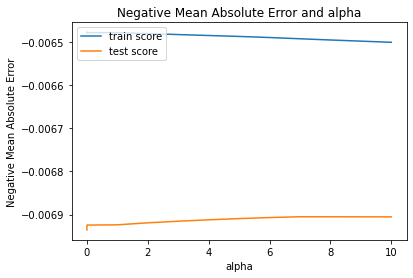

In [198]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Based on best_params_ and Negative Mean Absolute Error we will choose alpha = 7.0 for further analysis

In [218]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 7.0
ridge_main = Ridge(alpha=alpha)

ridge_main.fit(X_train_rfe, y_train)

print("Intercept: ", ridge_main.intercept_)
print("Coefficients:\n",ridge_main.coef_)

Intercept:  2.5662482916442695
Coefficients:
 [-0.00151979  0.00112575  0.00553374  0.00385297  0.00174622  0.00197272
  0.00151551  0.00122142  0.00756348  0.00183412  0.00222853  0.00178348
  0.00129589  0.00143576  0.00257619  0.00018171  0.00144516  0.00296064
 -0.00482943  0.00140365  0.00191737 -0.00138013 -0.00150522  0.00157822
  0.00238336  0.00200523  0.00141596  0.00513917  0.00270872  0.01052129
  0.00758212  0.0011024  -0.00201303  0.00291471  0.00122556  0.00105634
  0.00134178 -0.00095795  0.00121746  0.00047256]


In [ ]:
we are getting quite desecent cofficent and 

In [219]:
y_pred_train = ridge_main.predict(X_train_rfe)

In [220]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_main.predict(X_train_rfe)
X_test_rfe =  X_test[X_train_rfe.columns]
y_pred_test = ridge_main.predict(X_test_rfe)

metricRig = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2Score_Train: ',r2_train_lr)
metricRig.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2Score_Test: ',r2_test_lr)
metricRig.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_Train: ',rss1_lr)
metricRig.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_Test: ',rss2_lr)
metricRig.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_Train: ',mse_train_lr)
metricRig.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_Test: ',mse_test_lr)
metricRig.append(mse_test_lr**0.5)


R2Score_Train:  0.9006260897301539
R2Score_Test:  0.8796830571266786
RSS_Train:  0.09384285202184889
RSS_Test:  0.05122863608862069
MSE_Train:  9.191268562375014e-05
MSE_Test:  0.0001169603563667139


 The R2 values for Train and Test are quite well, indicating an optimum model

In [202]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE : 0.009587110389671652
RMSE : 0.010814821143537877


RMSE value is 0.6 shows that the model can relatively predict the data accurately.
Also all other metrics is quiet decent.

In [ ]:
Checking R2 values for different values of alpha (0.05,5,10,15,20)

In [214]:

alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)

y_train_pred=ridge.predict(X_train_rfe)
r2_score(y_train,y_train_pred)



0.9012216701482777

In [215]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)

y_train_pred=ridge.predict(X_train_rfe)
r2_score(y_train,y_train_pred)


0.9008567837066488

In [216]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)

y_train_pred=ridge.predict(X_train_rfe)
r2_score(y_train,y_train_pred)


0.9002569854315854

In [217]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)

y_train_pred=ridge.predict(X_train_rfe)
r2_score(y_train,y_train_pred)


0.899084285392789

As alpha increases R2 score decreases.

In [221]:
##Creating a dataframe of features and coefficients

ridge_df1 = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge_main.coef_.round(4), 
                         #'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))
                        })

##Sorting coefficient in descending order of absolute values and reset index
#ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df1.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df1.head(10)  #Top10

Features  Coefficient
0   LotFrontage      -0.0015
1       LotArea       0.0011
2   OverallQual       0.0055
3   OverallCond       0.0039
4      BsmtQual       0.0017
5  BsmtExposure       0.0020
6  BsmtFinType1       0.0015
7     HeatingQC       0.0012
8     GrLivArea       0.0076
9  BsmtFullBath       0.0018

In [ ]:
Residual Analysis

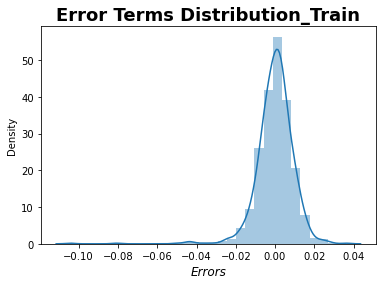

In [83]:
# Ploting the histogram of the error terms
res = (y_train - y_pred_train)     #residuals
sns.distplot(res , bins = 30)
plt.title('Error Terms Distribution_Train', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.show()

Error terms seem to be normally distributed with mean 0

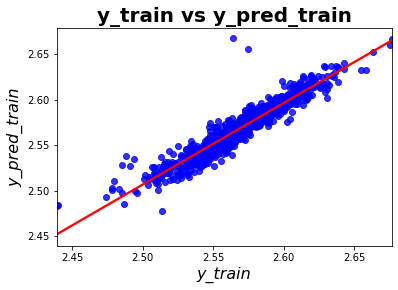

In [84]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.regplot(y_train,y_pred_train,scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ci=70)
#plt.scatter(y_train,y_pred_train)
plt.title('y_train vs y_pred_train', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train', fontstyle='italic', fontsize = 16) 
plt.show()

Datapoints are very close to fit line.

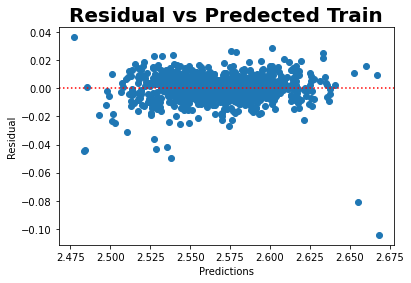

In [85]:
res = (y_train - y_pred_train) 
plt.scatter( y_pred_train , res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title('Residual vs Predected Train', fontweight='bold', fontsize = 20) 
plt.show()

Residual are independent of each other,no pattern observed also scattered along y=0 

In [ ]:
Test Data

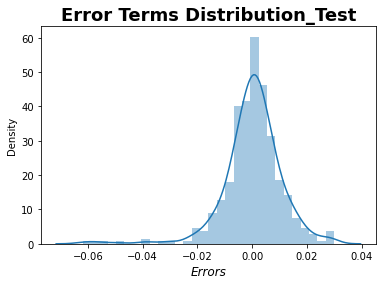

In [86]:
# Plot the histogram of the error terms (test set)

res = (y_test - y_pred_test)     #residuals
sns.distplot(res , bins = 30)
plt.title('Error Terms Distribution_Test', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.show()

Error terms are approximatly normally distributed with mean 0 for Test Data as well.

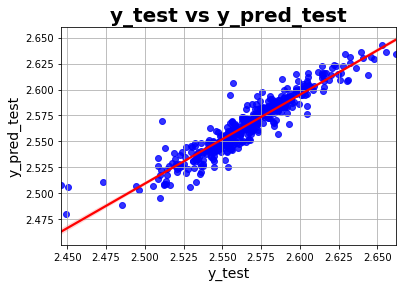

In [87]:
# Plotting y_test and y_pred_test_r to understand the spread.
#plt.scatter(y_test,y_pred_test)
sns.regplot(y_test,y_pred_test,scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ci=70)
plt.title('y_test vs y_pred_test', fontweight='bold', fontsize = 20)                  
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test', fontsize=14)  
plt.grid(True)
plt.show()

Datapoints are very close to fit line.

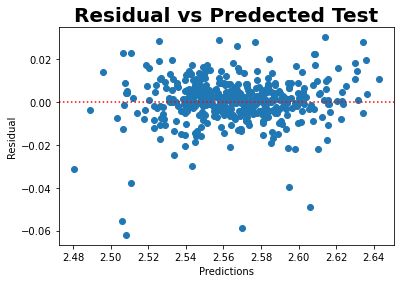

In [88]:
res1 = (y_test - y_pred_test) 
plt.scatter( y_pred_test , res1)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title('Residual vs Predected Test', fontweight='bold', fontsize = 20) 
plt.show()

Residual are independent of each other,no pattern observed also scattered along y=0 

##### LASSO

In [272]:
lasso = Lasso()

params_2 ={'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                     0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

 #{'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                     # 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}
##Cross-Validation

folds = 5
model_cv_l = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [273]:
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.0001}
-0.006874566401301324


In [274]:
# cv_results
cv_results_l = pd.DataFrame(model_cv.cv_results_)
cv_results_l[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
19           7         -0.006493        -0.006905                1
20           8         -0.006495        -0.006905                2
21           9         -0.006498        -0.006905                3
22          10         -0.006501        -0.006905                4
18           6         -0.006490        -0.006907                5
23          20         -0.006527        -0.006908                6
17           5         -0.006487        -0.006909                7
16           4         -0.006485        -0.006912                8
15           3         -0.006483        -0.006915                9
14           2         -0.006481        -0.006919               10
13           1         -0.006478        -0.006924               11
12         0.9         -0.006478        -0.006924               12
11         0.8         -0.006478        -0.006925               13
10         0.7         -0.006478        -0.006925               14
9          0.6         -0.006478        -0.006926               15
8          0.5         -0.006478        -0.006927               16
7          0.4         -0.006477        -0.006928               17
6          0.3         -0.006477        -0.006929               18
5          0.2         -0.006477        -0.006930               19
4          0.1         -0.006478        -0.006932               20
3         0.05         -0.006478        -0.006934               21
24          50         -0.006587        -0.006935               22
2         0.01         -0.006478        -0.006935               23
1        0.001         -0.006478        -0.006935               24
0       0.0001         -0.006478        -0.006935               25
25         100         -0.006664        -0.006986               26
26         500         -0.007274        -0.007518               27
27        1000         -0.008097        -0.008284               28

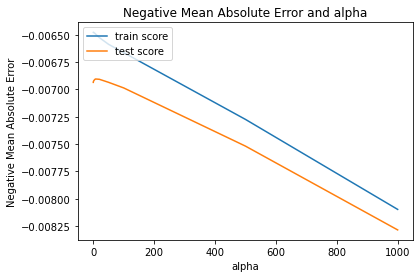

In [128]:
# plotting mean test and train scoes with alpha 
cv_results_l['param_alpha'] = cv_results_l['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [222]:
alpha =0.0001

lasso_main = Lasso(alpha=alpha)
        
lasso_main.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001)

In [130]:
print("Intercept: ", lasso_main.intercept_)
print("Coefficients:\n",lasso_main.coef_)

Intercept:  2.5662524176116794
Coefficients:
 [-1.26737247e-03  1.04225155e-03  5.94037856e-03  3.80476571e-03
  1.72177736e-03  1.84574630e-03  1.44071090e-03  1.21285355e-03
  7.76772853e-03  1.82116633e-03  2.07113421e-03  1.51644846e-03
  1.16411807e-03  1.47660855e-03  2.52153429e-03 -0.00000000e+00
  1.30694519e-03  2.73177274e-03 -4.82901921e-03  1.32519762e-03
  1.81331854e-03 -1.29225686e-03 -1.23212146e-03  1.42159030e-03
  2.18809002e-03  1.88470987e-03  1.21891740e-03  3.48406528e-03
  1.82812039e-03  7.38825112e-03  4.67647261e-03  1.33227651e-05
 -1.87783726e-03  2.65016690e-03  9.55656351e-04  9.11268444e-04
  1.23678180e-03  0.00000000e+00  1.16338433e-03  0.00000000e+00]


In [223]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_lasso = lasso_main.predict(X_train_rfe)
X_test_rfe_lasso =  X_test[X_train_rfe.columns]
y_pred_test_lasso = lasso_main.predict(X_test_rfe_lasso)

metriclasso = []
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print('R2Score_Train: ',r2_train_lasso)
metriclasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
print('R2Score_Test: ',r2_test_lasso)
metriclasso.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train_lasso))
print('RSS_Train: ',rss1_lasso)
metriclasso.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test_lasso))
print('RSS_Test: ',rss2_lasso)
metriclasso.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
print('MSE_Train: ',mse_train_lasso)
metriclasso.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print('MSE_Test: ',mse_test_lasso)
metriclasso.append(mse_test_lasso**0.5)


R2Score_Train:  0.8987295770646326
R2Score_Test:  0.8812035853464154
RSS_Train:  0.09563380657868178
RSS_Test:  0.050581224469183284
MSE_Train:  9.36668037009616e-05
MSE_Test:  0.00011548224764653718


In [132]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE : 0.009587110389671652
RMSE : 0.010814821143537877


In [225]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':lasso_main.coef_.round(4), 
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))
                        })
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

lasso_df.head(5)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0    GrLivArea       0.0078                            0.0078
1  MSZoning_RL       0.0074                            0.0074
2  OverallQual       0.0059                            0.0059
3   AgeOfHouse      -0.0048                            0.0048
4  MSZoning_RM       0.0047                            0.0047

In [228]:
#Top  Features
lasso_top5= lasso_df.loc[:4]
lasso_top5_features = list(lasso_top5['Features'].iloc[0:10])
lasso_top5_features

['GrLivArea', 'MSZoning_RL', 'OverallQual', 'AgeOfHouse', 'MSZoning_RM']

Residual Analysis

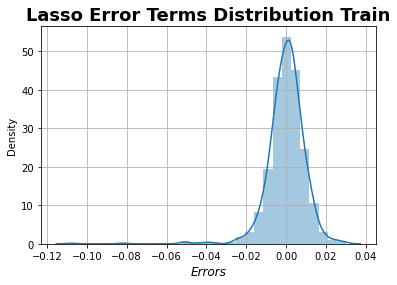

In [100]:
# Plot the histogram of the error terms
res1 = (y_train - y_pred_train_lasso)     #residuals
sns.distplot(res1 , bins = 30)
plt.title('Lasso Error Terms Distribution Train', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

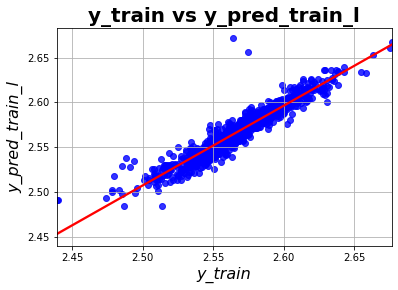

In [101]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.regplot(y_train,y_pred_train_lasso,scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ci=70)
#plt.scatter(y_train,y_pred_train_lasso)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

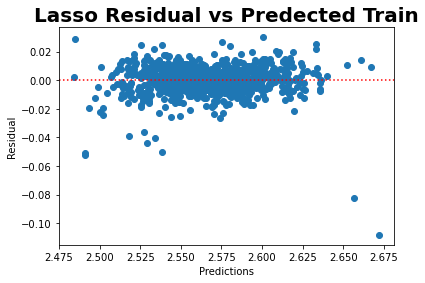

In [102]:
res1 = (y_train - y_pred_train_lasso) 
plt.scatter( y_pred_train_lasso , res1)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title('Lasso Residual vs Predected Train', fontweight='bold', fontsize = 20) 
plt.show()

In [136]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric01
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metricRig, name = 'Ridge Regression')
ls_metric = pd.Series(metriclasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.901222          0.900626          0.898730
1   R2 Score (Test)           0.879666          0.879683          0.881204
2       RSS (Train)           0.093280          0.093843          0.095634
3        RSS (Test)           0.051236          0.051229          0.050581
4       MSE (Train)           0.009558          0.009587          0.009678
5        MSE (Test)           0.010816          0.010815          0.010746

In [137]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [138]:
betas.rows = X_train.columns

In [139]:
betas['Linear'] = lrm1.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [140]:
pd.set_option('display.max_rows', None)
betas.head(50)

Linear     Ridge     Lasso
LotFrontage          -0.001572 -0.001520 -0.001267
LotArea               0.001115  0.001126  0.001042
OverallQual           0.005418  0.005534  0.005940
OverallCond           0.003804  0.003853  0.003805
BsmtQual              0.001738  0.001746  0.001722
BsmtExposure          0.002030  0.001973  0.001846
BsmtFinType1          0.001531  0.001516  0.001441
HeatingQC             0.001181  0.001221  0.001213
GrLivArea             0.007822  0.007563  0.007768
BsmtFullBath          0.001805  0.001834  0.001821
FullBath              0.002127  0.002229  0.002071
HalfBath              0.001765  0.001783  0.001516
BedroomAbvGr          0.001209  0.001296  0.001164
KitchenQual           0.001333  0.001436  0.001477
FireplaceQu           0.002585  0.002576  0.002522
GarageYrBlt           0.005646  0.000182 -0.000000
GarageFinish          0.001439  0.001445  0.001307
GarageArea            0.002897  0.002961  0.002732
AgeOfHouse           -0.004685 -0.004829 -0.004829
Neighborhood_ClearCr  0.001388  0.001404  0.001325
Neighborhood_Crawfor  0.001934  0.001917  0.001813
Neighborhood_Edwards -0.001449 -0.001380 -0.001292
Neighborhood_MeadowV -0.001538 -0.001505 -0.001232
Neighborhood_NoRidge  0.001584  0.001578  0.001422
Neighborhood_NridgHt  0.002422  0.002383  0.002188
Neighborhood_Somerst  0.001955  0.002005  0.001885
Neighborhood_StoneBr  0.001433  0.001416  0.001219
MSZoning_FV           0.007108  0.005139  0.003484
MSZoning_RH           0.003637  0.002709  0.001828
MSZoning_RL           0.014196  0.010521  0.007388
MSZoning_RM           0.010801  0.007582  0.004676
Exterior2nd_CmentBd   0.001450  0.001102  0.000013
MSSubClass_160       -0.002061 -0.002013 -0.001878
MSSubClass_20         0.003014  0.002915  0.002650
MSSubClass_50         0.001296  0.001226  0.000956
MSSubClass_70         0.001052  0.001056  0.000911
Exterior1st_BrkFace   0.001350  0.001342  0.001237
Exterior1st_CemntBd  -0.001309 -0.000958  0.000000
GarageType_Attchd     0.001173  0.001217  0.001163
GarageType_None       0.005907  0.000473  0.000000

Inferences:
Top 5 Features in predicting the price of a house are: -
'GrLivArea', 'MSZoning_RL', 'OverallQual', 'AgeOfHouse', 'MSZoning_RM'


### Subjective Question

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [146]:
print("Optimal value of alpha for Rigde :",ridge.alpha)
print("Optimal value of alpha for Lasso :",lasso.alpha)

Optimal value of alpha for Rigde : 7.0
Optimal value of alpha for Lasso : 0.0001


double the value of alpha for both ridge and lasso -

In [147]:
print('alpha for ridge=',ridge.alpha*2)
print('alpha for lasso=',lasso.alpha*2)

alpha for ridge= 14.0
alpha for lasso= 0.0002


In [144]:
##Checking the outcome: coefficient values with double the value of alpha = 8*2 = 16

alpha1 = 14.0
ridge1 = Ridge(alpha=alpha1)

ridge1.fit(X_train_rfe, y_train)

print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  2.5662482916442695
Coefficients:
 [-0.00151979  0.00112575  0.00553374  0.00385297  0.00174622  0.00197272
  0.00151551  0.00122142  0.00756348  0.00183412  0.00222853  0.00178348
  0.00129589  0.00143576  0.00257619  0.00018171  0.00144516  0.00296064
 -0.00482943  0.00140365  0.00191737 -0.00138013 -0.00150522  0.00157822
  0.00238336  0.00200523  0.00141596  0.00513917  0.00270872  0.01052129
  0.00758212  0.0011024  -0.00201303  0.00291471  0.00122556  0.00105634
  0.00134178 -0.00095795  0.00121746  0.00047256]


In [145]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge1.predict(X_train_rfe)
X_test_rfe =  X_test[X_train_rfe.columns]
y_pred_test = ridge1.predict(X_test_rfe)

metricRig_alpha = []
r2_train_lr_alpha = r2_score(y_train, y_pred_train)
print('R2Score_Train: ',r2_train_lr_alpha)
metricRig_alpha.append(r2_train_lr_alpha)

r2_test_lr_alpha = r2_score(y_test, y_pred_test)
print('R2Score_Test: ',r2_test_lr_alpha)
metricRig_alpha.append(r2_test_lr_alpha)

rss1_lr_alpha = np.sum(np.square(y_train - y_pred_train))
print('RSS_Train: ',rss1_lr_alpha)
metricRig_alpha.append(rss1_lr_alpha)

rss2_lr_alpha = np.sum(np.square(y_test - y_pred_test))
print('RSS_Test: ',rss2_lr_alpha)
metricRig_alpha.append(rss2_lr_alpha)

mse_train_lr_alpha = mean_squared_error(y_train, y_pred_train)
print('MSE_Train: ',mse_train_lr_alpha)
metricRig_alpha.append(mse_train_lr_alpha**0.5)

mse_test_lr_alpha = mean_squared_error(y_test, y_pred_test)
print('MSE_Test: ',mse_test_lr_alpha)
metricRig_alpha.append(mse_test_lr_alpha**0.5)

R2Score_Train:  0.8997665179437502
R2Score_Test:  0.8792190369876155
RSS_Train:  0.09465458085222908
RSS_Test:  0.05142620692340229
MSE_Train:  9.270771875830468e-05
MSE_Test:  0.0001174114313319687


In [169]:
alpha2 =0.0002

lasso1 = Lasso(alpha=alpha2)
        
lasso1.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0002)

In [170]:
print("Intercept: ", lasso1.intercept_)
print("Coefficients:\n",lasso1.coef_)

Intercept:  2.5662577636940727
Coefficients:
 [-0.00096549  0.00097668  0.00636932  0.00378533  0.00167536  0.0016471
  0.00139386  0.00121345  0.0076962   0.00181669  0.00194786  0.00129579
  0.00111343  0.00155083  0.00249627  0.          0.00128879  0.00270579
 -0.00475804  0.00126414  0.00171782 -0.00118056 -0.0010358   0.00126719
  0.00195393  0.00176697  0.00099531  0.0007088   0.00040539  0.00218069
  0.          0.         -0.00166361  0.00232059  0.00066563  0.00078211
  0.00113609  0.          0.00118016 -0.        ]


In [172]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_lasso1 = lasso1.predict(X_train_rfe)
X_test_rfe_lasso1 =  X_test[X_train_rfe.columns]
y_pred_test_lasso1 = lasso1.predict(X_test_rfe_lasso1)

metriclasso_alpha = []
r2_train_lasso1 = r2_score(y_train, y_pred_train_lasso1)
print('R2Score_Train: ',r2_train_lasso1)
metriclasso_alpha.append(r2_train_lasso1)

r2_test_lasso1 = r2_score(y_test, y_pred_test_lasso1)
print('R2Score_Test: ',r2_test_lasso1)
metriclasso_alpha.append(r2_test_lasso1)

rss1_lasso1 = np.sum(np.square(y_train - y_pred_train_lasso1))
print('RSS_Train: ',rss1_lasso1)
metriclasso_alpha.append(rss1_lasso1)

rss2_lasso1 = np.sum(np.square(y_test - y_pred_test_lasso1))
print('RSS_Test: ',rss2_lasso1)
metriclasso_alpha.append(rss2_lasso1)

mse_train_lasso1 = mean_squared_error(y_train, y_pred_train_lasso1)
print('MSE_Train: ',mse_train_lasso1)
metriclasso_alpha.append(mse_train_lasso1**0.5)

mse_test_lasso1 = mean_squared_error(y_test, y_pred_test_lasso1)
print('MSE_Test: ',mse_test_lasso1)
metriclasso_alpha.append(mse_test_lasso1**0.5)

R2Score_Train:  0.8934935368218687
R2Score_Test:  0.8782680367131336
RSS_Train:  0.10057841375321933
RSS_Test:  0.05183112451703585
MSE_Train:  9.8509709846444e-05
MSE_Test:  0.00011833590072382614


In [184]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric01
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metricRig, name = 'Ridge Regression')
ls_metric = pd.Series(metriclasso, name = 'Lasso Regression ')

rg_metric1 = pd.Series(metricRig_alpha, name = 'Ridge Regression (Alpha *2)')
ls_metric2 = pd.Series(metriclasso_alpha, name = 'Lasso Regression (Alpha*2)')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_metric1,ls_metric2], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression   \
0  R2 Score (Train)           0.901222          0.900626           0.898730   
1   R2 Score (Test)           0.879666          0.879683           0.881204   
2       RSS (Train)           0.093280          0.093843           0.095634   
3        RSS (Test)           0.051236          0.051229           0.050581   
4       MSE (Train)           0.009558          0.009587           0.009678   
5        MSE (Test)           0.010816          0.010815           0.010746   

   Ridge Regression (Alpha *2)  Lasso Regression (Alpha*2)  
0                     0.899767                    0.893494  
1                     0.879219                    0.878268  
2                     0.094655                    0.100578  
3                     0.051426                    0.051831  
4                     0.009628                    0.009925  
5                     0.010836                    0.010878

In [182]:
lasso_df1 = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':lasso1.coef_.round(4)
                         #,'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso1.coef_.round(4))
                        })
#lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df1.reset_index(drop=True, inplace=True)  

lasso_df1.head(10)

Features  Coefficient
0   LotFrontage      -0.0010
1       LotArea       0.0010
2   OverallQual       0.0064
3   OverallCond       0.0038
4      BsmtQual       0.0017
5  BsmtExposure       0.0016
6  BsmtFinType1       0.0014
7     HeatingQC       0.0012
8     GrLivArea       0.0077
9  BsmtFullBath       0.0018

In [ ]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge1.coef_.round(4) 
                         #,'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))
                        })

##Sorting coefficient in descending order of absolute values and reset index
#ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

Q3 After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [252]:
print("Top 5 features in original lasso model: ", lasso_top5_features)

Top 5 features in original lasso model:  ['GrLivArea', 'MSZoning_RL', 'OverallQual', 'AgeOfHouse', 'MSZoning_RM']


In [253]:

housing_data= housing_data_df
print('Shape of DF Before dropping top 5 variables',housing_data.shape)
#Removing top5 features from orignal dataset

housing_data= housing_data.drop(top5_original_lasso_features, axis=1)
housing_data.head()
print('Shape of DF after dropping top 5 variables',housing_data.shape)

Shape of DF Before dropping top 5 variables (1460, 131)
Shape of DF after dropping top 5 variables (1460, 126)


Creating X and Y with new dataset

In [254]:
housing_data.shape

(1460, 126)

In [255]:
X_new = housing_data.drop(['SalePrice'], axis=1)
X_new.head()


LotFrontage  LotArea  LotShape  OverallCond  MasVnrArea  ExterQual  \
0         65.0     8450         3            5       196.0          4   
1         80.0     9600         3            8         0.0          3   
2         68.0    11250         2            5       162.0          4   
3         60.0     9550         2            5         0.0          3   
4         84.0    14260         2            5       350.0          4   

   BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         4             1             6         706        150          856   
1         4             4             5         978        284         1262   
2         4             2             6         486        434          920   
3         3             1             5         216        540          756   
4         4             3             6         655        490         1145   

   HeatingQC  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
0          5             1         2         1             3            4   
1          5             0         2         0             3            3   
2          5             1         2         1             3            4   
3          4             1         1         0             3            4   
4          5             1         2         1             4            4   

   Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageArea  WoodDeckSF  \
0           0            0         2003             2         548           0   
1           1            3         1976             2         460         298   
2           1            3         2001             2         608           0   
3           1            4         1998             1         642           0   
4           1            3         2000             2         836         192   

   OpenPorchSF  RemodelorNot  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0           61             0                  0              0              0   
1            0             0                  0              1              0   
2           42             1                  0              0              0   
3           35             1                  0              0              0   
4           84             0                  0              1              0   

   LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0                 1                     0                    0   
1                 0                     0                    0   
2                 1                     0                    0   
3                 0                     0                    0   
4                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0       

In [256]:
X_new.shape

(1460, 125)

In [257]:
# Putting response variable to y
y_new = housing_data['SalePrice']
print(y.head())
print(y.shape)


0    2.583824
1    2.573300
2    2.589054
3    2.553297
4    2.597433
Name: SalePrice, dtype: float64
(1460,)


In [258]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale
cols_new = X_new.columns
#Scaling variables using Scale as there are outlies present in data
X_new = pd.DataFrame(scale(X_new))
X_new.columns = cols_new
X_new.columns


Index(['LotFrontage', 'LotArea', 'LotShape', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       ...
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=125)

In [259]:
# split into train and test

X_train_new, X_tes_new, y_train_new, y_test_new = train_test_split(X_new, y_new, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
#Using RFE to select top 40 features and check
lm_new = LinearRegression()
lm_new.fit(X_train_new, y_train_new)
rfe_new = RFE(lm_new, 40)            
rfe_new = rfe_new.fit(X_train_new, y_train_new)


In [260]:
col_new = X_train_new.columns[rfe_new.support_]
col_new.shape


(40,)

In [261]:
#stroring top 40 features 
X_train_rfe_new = X_train_new[col_new]


In [262]:
X_train_lrm_new = sm.add_constant(X_train_rfe_new)
lrm_new = sm.OLS(y_train_new,X_train_lrm_new).fit()
print(lrm_new.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     168.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:55:08   Log-Likelihood:                 3171.6
No. Observations:                1021   AIC:                            -6261.
Df Residuals:                     980   BIC:                            -6059.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.5663 

In [247]:
y_pred_train_new = lrm_new.predict(X_train_lrm_new)

In [250]:

X_test_nw1 = X_tes_new[X_train_rfe_new.columns]

In [263]:
#predicting vaules and measuring different mertices
y_pred_train_new = lrm_new.predict(X_train_lrm_new)
X_test_nw1 = X_tes_new[X_train_rfe_new.columns]
X_test_nw1= sm.add_constant(X_test_nw1)
y_pred_test_new = lrm_new.predict(X_test_nw1)

metric01 = []
r2_train_lr = r2_score(y_train, y_pred_train_new)
print(r2_train_lr)
metric01.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_new)
print(r2_test_lr)
metric01.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_new))
print(rss1_lr)
metric01.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_new))
print(rss2_lr)
metric01.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_new)
print(mse_train_lr)
metric01.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_new)
print(mse_test_lr)
metric01.append(mse_test_lr**0.5)

0.8731452675427392
0.8402053491430372
0.11979411752976195
0.06803748351783204
0.00011733018367263658
0.00015533672036034712


Model Building Using Lasso and evaluation

In [265]:
lasso_new1 = Lasso()

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso_new1,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train_rfe_new, y_train_new) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [266]:
print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)

{'alpha': 0.0001}
-0.008283884765523632


In [275]:
# cv_results
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1       0.0001         -0.007709        -0.008284                1
2       0.0002         -0.007732        -0.008295                2
3       0.0003         -0.007780        -0.008320                3
0        1e-05         -0.007721        -0.008332                4
4       0.0004         -0.007850        -0.008371                5
5       0.0005         -0.007924        -0.008423                6
6       0.0006         -0.008000        -0.008480                7
7       0.0007         -0.008087        -0.008546                8
8       0.0008         -0.008181        -0.008623                9
9       0.0009         -0.008281        -0.008707               10
10       0.001         -0.008384        -0.008800               11
11       0.002         -0.009302        -0.009654               12
12       0.003         -0.010168        -0.010403               13
13       0.005         -0.011680        -0.011863               14
14        0.01         -0.015251        -0.015409               15
15        0.02         -0.023586        -0.023643               16
16        0.05         -0.023772        -0.023822               17

In [276]:
alpha =0.0001

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train_rfe_new, y_train_new) 

Lasso(alpha=0.0001)

In [278]:
print("Intercept: ", lasso_new.intercept_)
print("Coefficients:\n",lasso_new.coef_)

Intercept:  2.566267217353125
Coefficients:
 [ 0.00406569  0.00137372  0.0027584   0.00240482  0.0013334   0.00387905
  0.00121779  0.00163563  0.00501292  0.00315914  0.00212901  0.00302179
  0.0040932  -0.          0.00178963  0.00447225  0.00162112  0.00191587
 -0.00142335 -0.00200332 -0.00250396  0.00258515  0.00228234 -0.00151648
  0.00187445  0.00187798  0.00040259  0.00127302  0.00175332 -0.00187979
  0.00122349  0.00172868  0.00174356  0.00110696  0.00124732  0.00136606
  0.          0.00214153  0.00085329  0.0007223 ]


In [280]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train_rfe_new.columns, 'Coefficient':lasso_new.coef_.round(4), 
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso_new.coef_.round(4))
                        })
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

lasso_df.head(5)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0     FullBath       0.0050                            0.0050
1   GarageArea       0.0045                            0.0045
2  OverallCond       0.0041                            0.0041
3  FireplaceQu       0.0041                            0.0041
4  TotalBsmtSF       0.0039                            0.0039

In [281]:
y_pred_train_lnew = lasso_new.predict(X_train_rfe_new)
X_test_rfe_lnew =  X_test[X_train_rfe_new.columns]
y_pred_test_lnew = lasso_new.predict(X_test_rfe_lnew)

metriclasso = []
r2_train_lasso = r2_score(y_train_new, y_pred_train_lnew)
print('R2Score_Train: ',r2_train_lasso)
metriclasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test_lnew)
print('R2Score_Test: ',r2_test_lasso)
metriclasso.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train_lnew))
print('RSS_Train: ',rss1_lasso)
metriclasso.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test_lnew))
print('RSS_Test: ',rss2_lasso)
metriclasso.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lnew)
print('MSE_Train: ',mse_train_lasso)
metriclasso.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test_lnew)
print('MSE_Test: ',mse_test_lasso)
metriclasso.append(mse_test_lasso**0.5)

R2Score_Train:  0.8725459178951727
R2Score_Test:  0.8425818197871623
RSS_Train:  0.12036010794045635
RSS_Test:  0.0670256281058195
MSE_Train:  0.00011788453275265068
MSE_Test:  0.0001530265481868025
